# Capstone Project: CDC Diabetes Health Indicator

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  

# Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

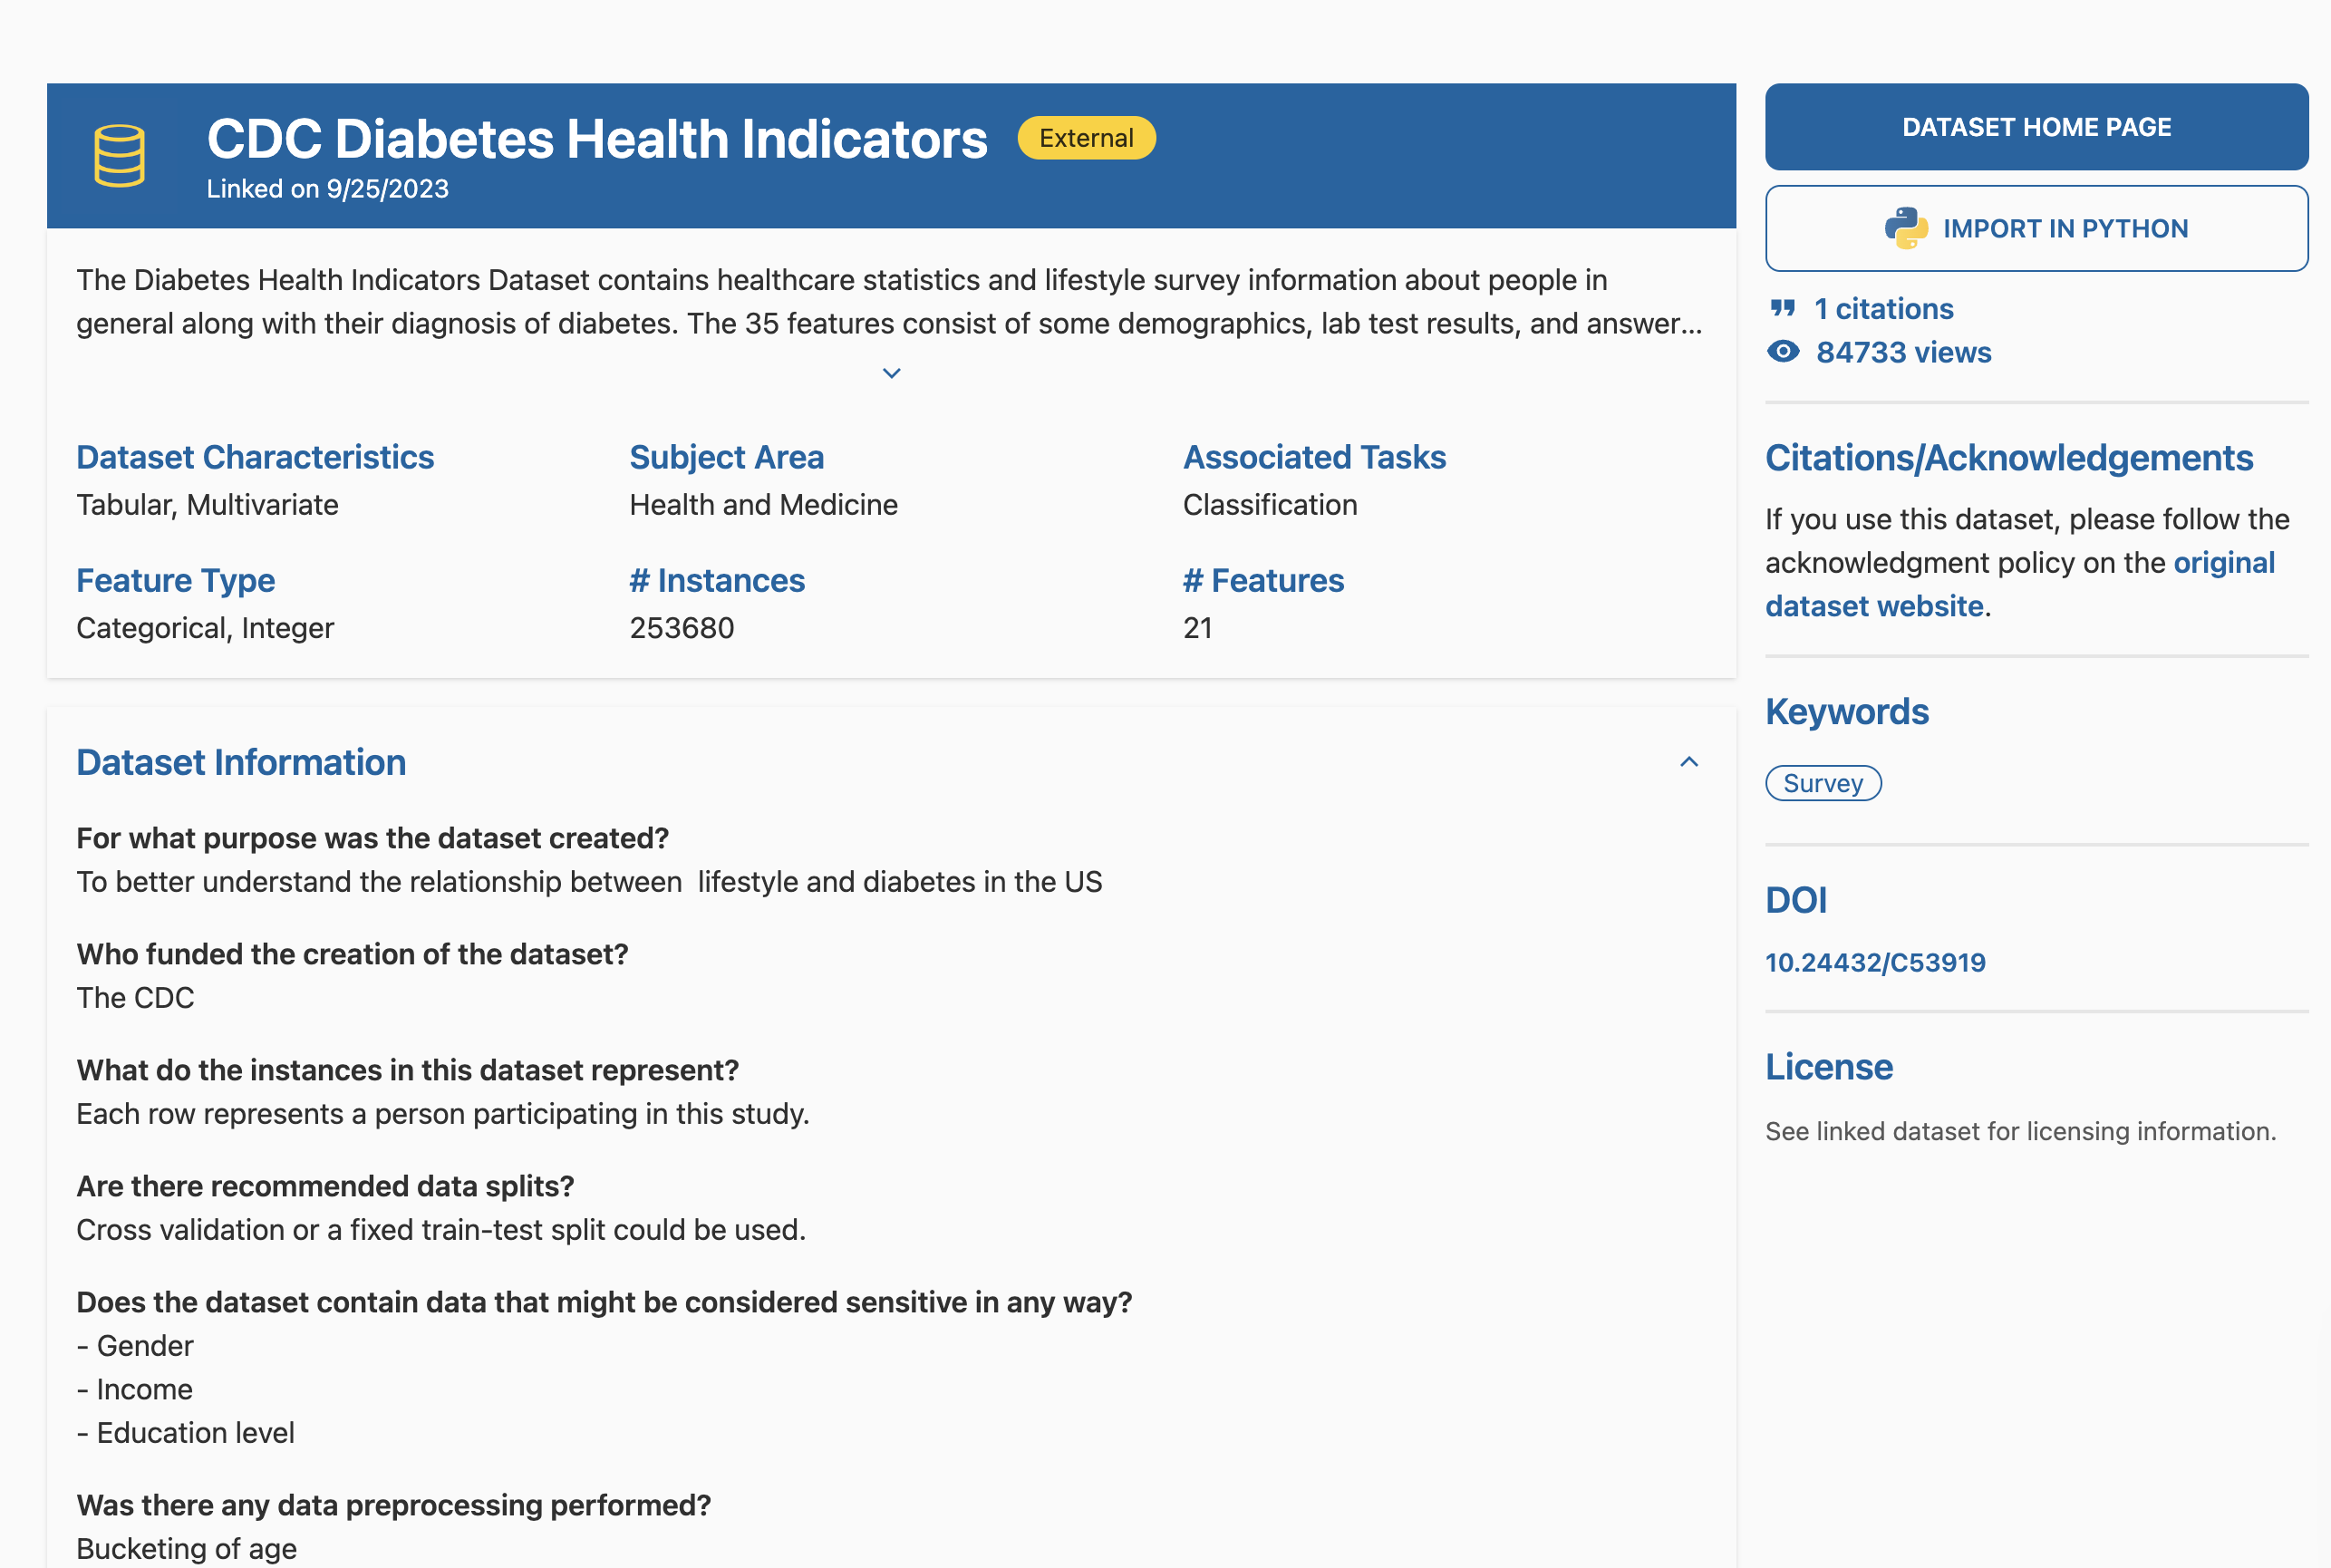

# Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the article, there were **17 campaigns** between **May 2008** and **Nov 2010**. These **phone campaings** focused on offered **long-term deposits** with **good interest rates**. The **success** was determined if the **customer subscribed to the long-term deposits**.

From the article:
"The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored (e.g. see Table 2) and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate)." 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import timeit
import plotly.graph_objs as go
from plotly.subplots import make_subplots

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load Data for analysis

In [2]:
# Import the dataset into the Jupyter Notebook Project

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [3]:
# variable information 

cdc_diabetes_health_indicators.variables

name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             None   
15               GenHlth  Feature  Integer             None   
16              MentHlth  Feature  Integer             None   
17              PhysHlth  Feature  Integer             None   
18              DiffWalk  Feature   Binary             None   
19                   Sex  Feature   Binary              Sex   
20                   Age  Feature  Integer              Age   
21             Education  Feature  Integer  Education Level   
22                Income  Feature  Integer           Income   

                                          description units missing_values  
0                                          Patient ID  None             no  
1         0 = no diabetes 1 = prediabetes or diabetes  None             no  
2                          0 = no high BP 1 = high BP  None             no  
3        0 = no high cholesterol 1 = high cholesterol  None             no  
4   0 = no cholesterol check in 5 years 1 = yes ch...  None             no  
5                                     Body Mass Index  None             no  
6   Have you smoked at least 100 cigarettes in you...  None             no  
7        (Ever told) you had a stroke. 0 = no 1 = yes  None             no  
8   coronary heart disease (CHD) or myocardial inf...  None             no  
9   physical activity in past 30 days - not includ...  None             no  
10  Consume Fruit 1 or more times per day 0 = no 1...  None             no  
11  Consume Vegetables 1 or more times per day 0 =...  None             no  
12  Heavy drinkers (adult men having more than 14 ...  None             no  
13  Have any kind of health care coverage, includi...  None             no  
14  Was there a time in the past 12 months when yo...  None             no  
15  Would you say that in general your health is: ...  None             no  
16  Now thinking about your mental health, which i...  None             no  
17  Now thinking about your physical health, which...  None             no  
18  Do you have serious difficulty walking or clim...  None             no  
19                                0 = female 1 = male  None             no  
20  13-level age category (_AGEG5YR see codebook) ...  None             no  
21  Education level (EDUCA see codebook) scale 1-6...  None             no  
22  Income scale (INCOME2 see codebook) scale 1-8 ...  None             no

# Understanding the Data

In [4]:
with pd.option_context('display.max_colwidth', None):
  display(cdc_diabetes_health_indicators.variables.description)

0                                                                                                                                                                                                                                                                                                                                  Patient ID
1                                                                                                                                                                                                                                                                                                 0 = no diabetes 1 = prediabetes or diabetes
2                                                                                                                                                                                                                                                                                                                  0 = no high BP 1 = high B

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [6]:
print (f'Total # of Rows: {X.shape[0]:,} and Total # of Columns: {X.shape[1]}')

Total # of Rows: 253,680 and Total # of Columns: 21


In [7]:
# Since all the attributes are numeric data, let's explore the statistical information for each of the attribute

X.describe().T

count       mean       std   min   25%   50%   75%  \
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [8]:
# Let's look at the first 10 rows of the dataset
# Since there are 21 columns, I will transpose the data to display the data 
X.head(10).T

0   1   2   3   4   5   6   7   8   9
HighBP                 1   0   1   1   1   1   1   1   1   0
HighChol               1   0   1   0   1   1   0   1   1   0
CholCheck              1   0   1   1   1   1   1   1   1   1
BMI                   40  25  28  27  24  25  30  25  30  24
Smoker                 1   1   0   0   0   1   1   1   1   0
Stroke                 0   0   0   0   0   0   0   0   0   0
HeartDiseaseorAttack   0   0   0   0   0   0   0   0   1   0
PhysActivity           0   1   0   1   1   1   0   1   0   0
Fruits                 0   0   1   1   1   1   0   0   1   0
Veggies                1   0   0   1   1   1   0   1   1   1
HvyAlcoholConsump      0   0   0   0   0   0   0   0   0   0
AnyHealthcare          1   0   1   1   1   1   1   1   1   1
NoDocbcCost            0   1   1   0   0   0   0   0   0   0
GenHlth                5   3   5   2   2   2   3   3   5   2
MentHlth              18   0  30   0   3   0   0   0  30   0
PhysHlth              15   0  30   0   0   2  14   0  30   0
DiffWalk               1   0   1   0   0   0   0   1   1   0
Sex                    0   0   0   0   0   1   0   0   0   1
Age                    9   7   9  11  11  10   9  11   9   8
Education              4   6   4   3   5   6   6   4   5   4
Income                 3   1   8   6   4   8   7   4   1   3

In [9]:
# Let's look at the last 10 rows of the dataset
X.tail(10).T

253670  253671  253672  253673  253674  253675  253676  \
HighBP                     1       1       1       1       0       1       1   
HighChol                   1       1       0       0       0       1       1   
CholCheck                  1       1       1       1       1       1       1   
BMI                       25      23      30      42      27      45      18   
Smoker                     0       0       1       0       0       0       0   
Stroke                     0       1       0       0       0       0       0   
HeartDiseaseorAttack       1       1       1       0       0       0       0   
PhysActivity               0       0       1       1       0       0       0   
Fruits                     1       0       1       1       0       1       0   
Veggies                    0       0       1       1       1       1       0   
HvyAlcoholConsump          0       0       0       0       0       0       0   
AnyHealthcare              1       1       1       1       1       1       1   
NoDocbcCost                0       1       0       0       0       0       0   
GenHlth                    5       4       3       3       1       3       4   
MentHlth                  15       0       0      14       0       0       0   
PhysHlth                   0       5       0       4       0       5       0   
DiffWalk                   1       0       0       0       0       0       1   
Sex                        0       1       1       1       0       1       0   
Age                       13       8      12       3       3       5      11   
Education                  6       3       2       6       6       6       2   
Income                     4       2       1       8       5       7       4   

                      253677  253678  253679  
HighBP                     0       1       1  
HighChol                   0       0       1  
CholCheck                  1       1       1  
BMI                       28      23      25  
Smoker                     0       0       0  
Stroke                     0       0       0  
HeartDiseaseorAttack       0       0       1  
PhysActivity               1       0       1  
Fruits                     1       1       1  
Veggies                    0       1       0  
HvyAlcoholConsump          0       0       0  
AnyHealthcare              1       1       1  
NoDocbcCost                0       0       0  
GenHlth                    1       3       2  
MentHlth                   0       0       0  
PhysHlth                   0       0       0  
DiffWalk                   0       0       0  
Sex                        0       1       0  
Age                        2       7       9  
Education                  5       5       6  
Income                     2       1       2

In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Diabetes_binary  253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [11]:
y.Diabetes_binary.unique()

array([0, 1])

In [12]:
# List the count of unique values for each column
# If column has less than 15 unique values, display them in sorted order

for col in X.columns:
    print (f'{col:<20} : {X[col].nunique():2} unique values.', end = ' ')
    print ('They are :', sorted(X[col].unique())) if (X[col].nunique() < 15) else print()

HighBP               :  2 unique values. They are : [0, 1]
HighChol             :  2 unique values. They are : [0, 1]
CholCheck            :  2 unique values. They are : [0, 1]
BMI                  : 84 unique values. 
Smoker               :  2 unique values. They are : [0, 1]
Stroke               :  2 unique values. They are : [0, 1]
HeartDiseaseorAttack :  2 unique values. They are : [0, 1]
PhysActivity         :  2 unique values. They are : [0, 1]
Fruits               :  2 unique values. They are : [0, 1]
Veggies              :  2 unique values. They are : [0, 1]
HvyAlcoholConsump    :  2 unique values. They are : [0, 1]
AnyHealthcare        :  2 unique values. They are : [0, 1]
NoDocbcCost          :  2 unique values. They are : [0, 1]
GenHlth              :  5 unique values. They are : [1, 2, 3, 4, 5]
MentHlth             : 31 unique values. 
PhysHlth             : 31 unique values. 
DiffWalk             :  2 unique values. They are : [0, 1]
Sex                  :  2 unique values

### Key values for each of the Binary Attributes
```
Target Variable: 

Diabetes_binary (y)   0 = no diabetes
                      1 = prediabetes or diabetes

Input Variables:

HighBP                0 = no high BP
                      1 = high BP

HighChol              0 = no high cholesterol
                      1 = high cholesterol

CholCheck             0 = no cholesterol check in 5 years
                      1 = yes cholesterol check in 5 years

Smoker                Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
                      0 = no
                      1 = yes

Stroke                (Ever told) you had a stroke
                      0 = no
                      1 = yes 

HeartDiseaseorAttack  Coronary Heart Disease (CHD) or Myocardial Infarction (MI)
                      0 = no
                      1 = yes 

PhysActivity          Physical activity in past 30 days - not including job
                      0 = no
                      1 = yes 

Fruits                Consume Fruit 1 or more times per day
                      0 = no
                      1 = yes 

Veggies               Consume Vegetables 1 or more times per day
                      0 = no
                      1 = yes 

HvyAlcoholConsump     Heavy drinkers (adult men having more than 14 drinks per week and
                                      adult women having more than 7 drinks per week)
                      0 = no
                      1 = yes 

AnyHealthcare         Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
                      0 = no
                      1 = yes 

NoDocbcCost           Was there a time in the past 12 months when you needed to see a doctor
                      but could not because of cost?
                      0 = no
                      1 = yes

DiffWalk              Do you have serious difficulty walking or climbing stairs?
                      0 = no
                      1 = yes 

Sex                   0 = female
                      1 = male
```

### Key values for each of the Numeric Attributes with Range of Values

```
GenHlth               Would you say that in general your health is: scale 1-5
                      1 = excellent
                      2 = very good
                      3 = good
                      4 = fair
                      5 = poor

Age                   13-level age category (_AGEG5YR see codebook)
                      1  = 18-24
                      2  = 25-29
                      3  = 30-34
                      4  = 35-39
                      5  = 40-44
                      6  = 45-49
                      7  = 50-54
                      8  = 55-59
                      9  = 60-64
                      10 = 65-69
                      11 = 70-74
                      12 = 75-79
                      13 = 80 or older

Education             Education level (EDUCA see codebook) scale 1-6
                      1 = Never attended school or only kindergarten
                      2 = Grades 1 through 8 (Elementary)
                      3 = Grades 9 through 11 (Some high school)
                      4 = Grade 12 or GED (High school graduate)
                      5 = College 1 year to 3 years (Some college or technical school)
                      6 = College 4 years or more (College graduate)  

Income                Income scale (INCOME2 see codebook) scale 1-8
                      1 = less than $10,000
                      2 = less than $15,000
                      3 = less than $20,000
                      4 = less than $25,000
                      5 = less than $35,000
                      6 = less than $50,000
                      7 = less than $75,000
                      8 = $75,000 or more

```

Refer to pages 23 (for Income) and 108 (for Age) in the link below \
https://www.cdc.gov/brfss/annual_data/2014/pdf/CODEBOOK14_LLCP.pdf

# Data Analysis and Data Visualization 

In [13]:
# Let's visualize each of the attributes using the pie plot to see how they are distributed

#### HighBP - Attribute to evaluate if Patient has High BP
A value of 0 = No High BP, a value of 1 = High BP

In [14]:
# First, summarize the High BP column and calculate the % of data split between the two values 
# (0 and 1 - No High BP and High BP)

grouped_v = X.groupby(['HighBP'])['HighBP'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

HighBP
0    57.09989
1    42.90011
Name: HighBP, dtype: float64

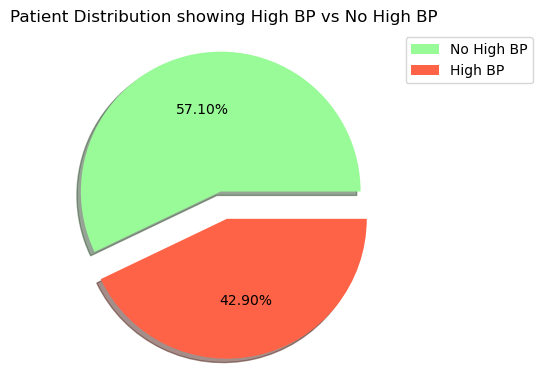

In [15]:
# Next is to visualizing the High BP attribute

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = ['No High BP', 'High BP'],
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 1),loc='best')
plt.title('Patient Distribution showing High BP vs No High BP')
plt.tight_layout()
plt.show()

#### HighChol - Attribute to evaluate if Patient has High Cholesterol
A value of 0 = No High Cholesterol, a value of 1 = High Cholesterol

In [16]:
# First, summarize the High Cholesterol column and calculate the % of data split between the two values 
# (0 and 1 - No High Cholesterol and High Cholesterol)

grouped_v = X.groupby(['HighChol'])['HighChol'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

HighChol
0    57.587906
1    42.412094
Name: HighChol, dtype: float64

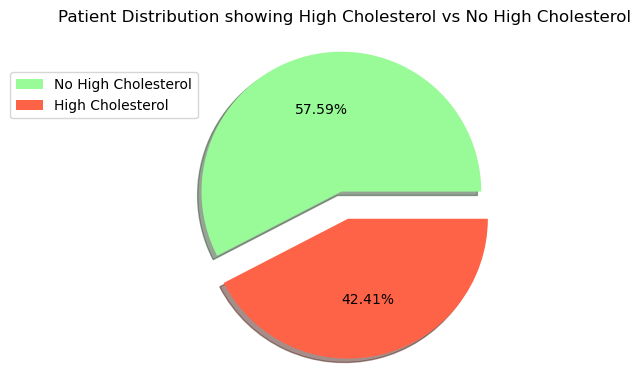

In [17]:
# Next is to visualizing the High Cholesterol attribute

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = ['No High Cholesterol', 'High Cholesterol'],
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(0.1, 0.9),loc='upper right')
plt.title('Patient Distribution showing High Cholesterol vs No High Cholesterol')
plt.tight_layout()
plt.show()

#### CholCheck - Attribute to evaluate if Patient has done a Cholesterol Check in the past 5 years
A value of 0 = Did not do a Cholesterol Check in last 5 years, a value of 1 = Did a Cholesterol Check in last 5 years

In [18]:
# First, summarize the High Cholesterol column and calculate the % of data split between the two values 
# (0 and 1 - No Cholesterol Check in last 5 years and Did Cholesterol Check in last 5 years)

grouped_v = X.groupby(['CholCheck'])['CholCheck'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

CholCheck
0     3.73305
1    96.26695
Name: CholCheck, dtype: float64

In [19]:
# Convert the Index values into meaningful values
cc_label = grouped_v.index.map({0:'No Cholestrol Check in last 5 years',
                               1:'Cholestrol Check in last 5 years'}).to_list()
cc_label

['No Cholestrol Check in last 5 years', 'Cholestrol Check in last 5 years']

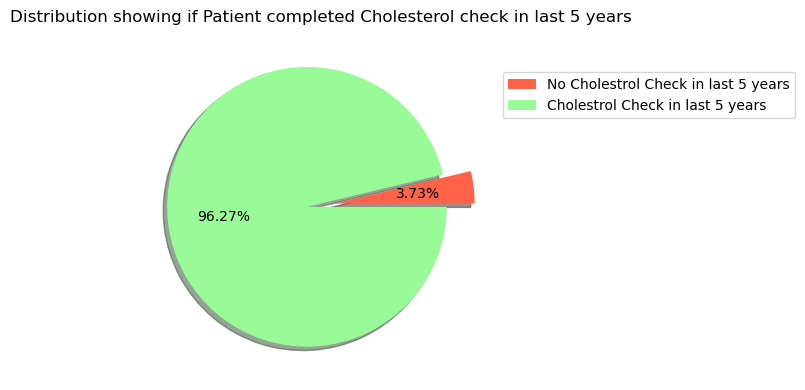

In [20]:
# Next is to visualizing the attribute for Cholesterol Check for last 5 years

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  #labels = ['No Cholestrol Check in last 5 years', 'Cholestrol Check in last 5 years'],
                  labels = cc_label,
                  colors = ['tomato','palegreen'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing if Patient completed Cholesterol check in last 5 years')
plt.tight_layout()
plt.show()

#### Smoker - Attribute to evaluate if Patient has smoked at least 100 cigarettes in their entire life

[Note: 5 packs = 100 cigarettes]

A value of 0 = incdicates they are not considered a Smoker, a value of 1 = indicates they have smoked 100 cigarettes and considered a Smoker

In [21]:
# First, summarize the Smoker column and calculate the % of data split between the two values 
# (0 and 1 - No Cholesterol Check in last 5 years and Did Cholesterol Check in last 5 years)

grouped_v = X.groupby(['Smoker'])['Smoker'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

Smoker
0    55.683144
1    44.316856
Name: Smoker, dtype: float64

In [22]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({0:'Not a Smoker',1:'Smoker'}).to_list()
label_v

['Not a Smoker', 'Smoker']

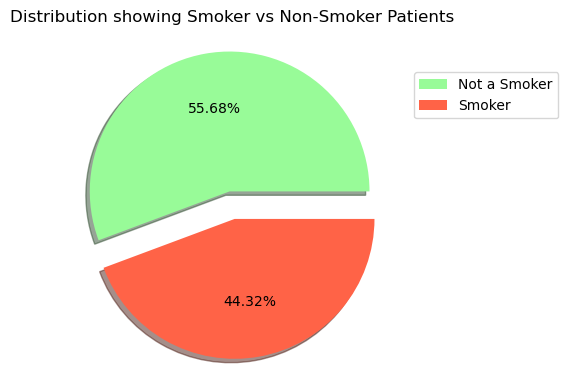

In [23]:
# Next is to visualizing the attribute if Patient is a Smoker

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Smoker vs Non-Smoker Patients')
plt.tight_layout()
plt.show()

#### Stroke - Attribute checks if Patient has ever had a Stoke in the past
A value of 0 = has not had a Stroke in the past, a value of 1 = has had a Stoke in the past

In [24]:
# First, summarize the Stroke column and calculate the % of data split between the two values 
# (0 and 1 - Has NOT had Stroke and Had Stroke)

grouped_v = X.groupby(['Stroke'])['Stroke'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

Stroke
0    95.94292
1     4.05708
Name: Stroke, dtype: float64

In [25]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({0:'Has Not had a Stroke',1:'Had a Stroke'}).to_list()
label_v

['Has Not had a Stroke', 'Had a Stroke']

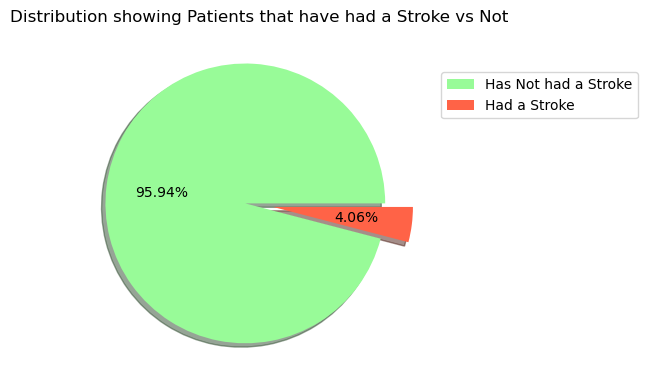

In [26]:
# Next is to visualizing the attribute if Patient is has had a Stroke

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Patients that have had a Stroke vs Not')
plt.tight_layout()
plt.show()

#### HeartDiseaseorAttack - Attribute checks if Patient has been diagnosed having Coronary Heart Disease (CHD) or Myocardial Infarction (MI)
A value of 0 = has not had a Heart Disease or Attack, a value of 1 = has had a Heart Disease or Attack in the past

In [27]:
# First, summarize the HeartDiseaseorAttack column and calculate the % of data split between the two values 
# (0 and 1 - Has NOT had Heart Disease or Attack and Had Heart Disease or Attack)

grouped_v = X.groupby(['HeartDiseaseorAttack'])['HeartDiseaseorAttack'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

HeartDiseaseorAttack
0    90.581441
1     9.418559
Name: HeartDiseaseorAttack, dtype: float64

In [28]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({0:'Has Not had a Heart Disease or Attack',1:'Had a Heart Disease or Attack'}).to_list()
label_v

['Has Not had a Heart Disease or Attack', 'Had a Heart Disease or Attack']

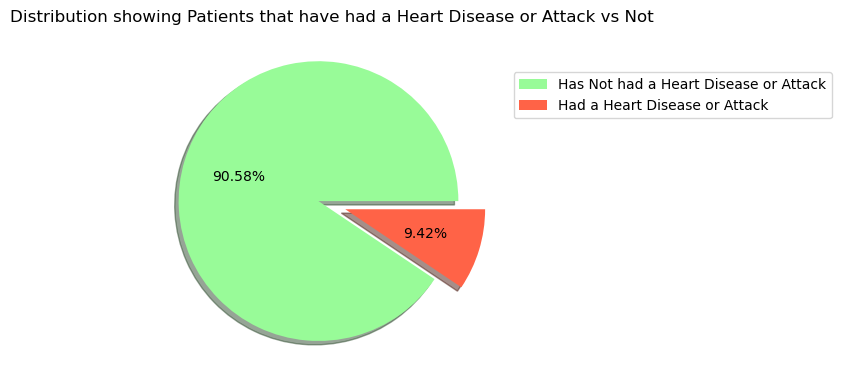

In [29]:
# Next is to visualizing the attribute if Patient has had a Heart Discease or Heart Attack

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Patients that have had a Heart Disease or Attack vs Not')
plt.tight_layout()
plt.show()

#### PhysActivity - Attribute checks if Patient has had any Physical Activity in the past 30 days (not including job)
A value of 0 = has not had any Physical Activity, a value of 1 = has had a Physical Activity in past 30 days

In [30]:
# First, summarize the PhysActivity column and calculate the % of data split between the two values 
# (0 and 1 - Has NOT had any Physical Activity and Had Physical Activity)

grouped_v = X.groupby(['PhysActivity'])['PhysActivity'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

PhysActivity
0    24.345632
1    75.654368
Name: PhysActivity, dtype: float64

In [31]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({0:'No Physical Activity',1:'Had Physical Activity'}).to_list()
label_v

['No Physical Activity', 'Had Physical Activity']

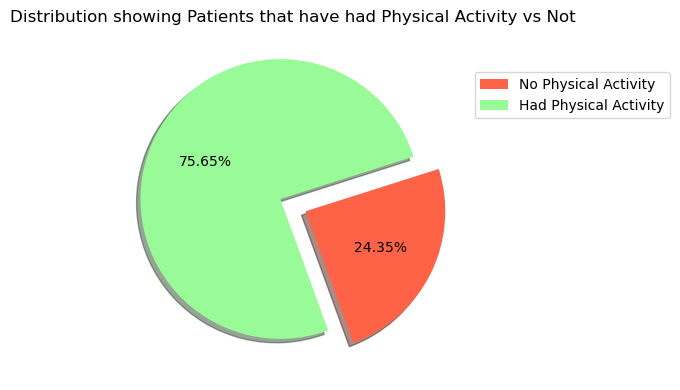

In [32]:
# Next is to visualizing the attribute if Patient is a Smoker

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  startangle=290,
                  colors = ['tomato', 'palegreen'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Patients that have had Physical Activity vs Not')
plt.tight_layout()
plt.show()

### Visualization of all Binary Attributes 

In [33]:
# Let's create a list of all binary columns and build a pie plot grid to show the 

binary_cols = [col for col in X.columns if X[col].nunique() == 2]
print (binary_cols)

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


In [34]:
nrows = len(binary_cols)//2

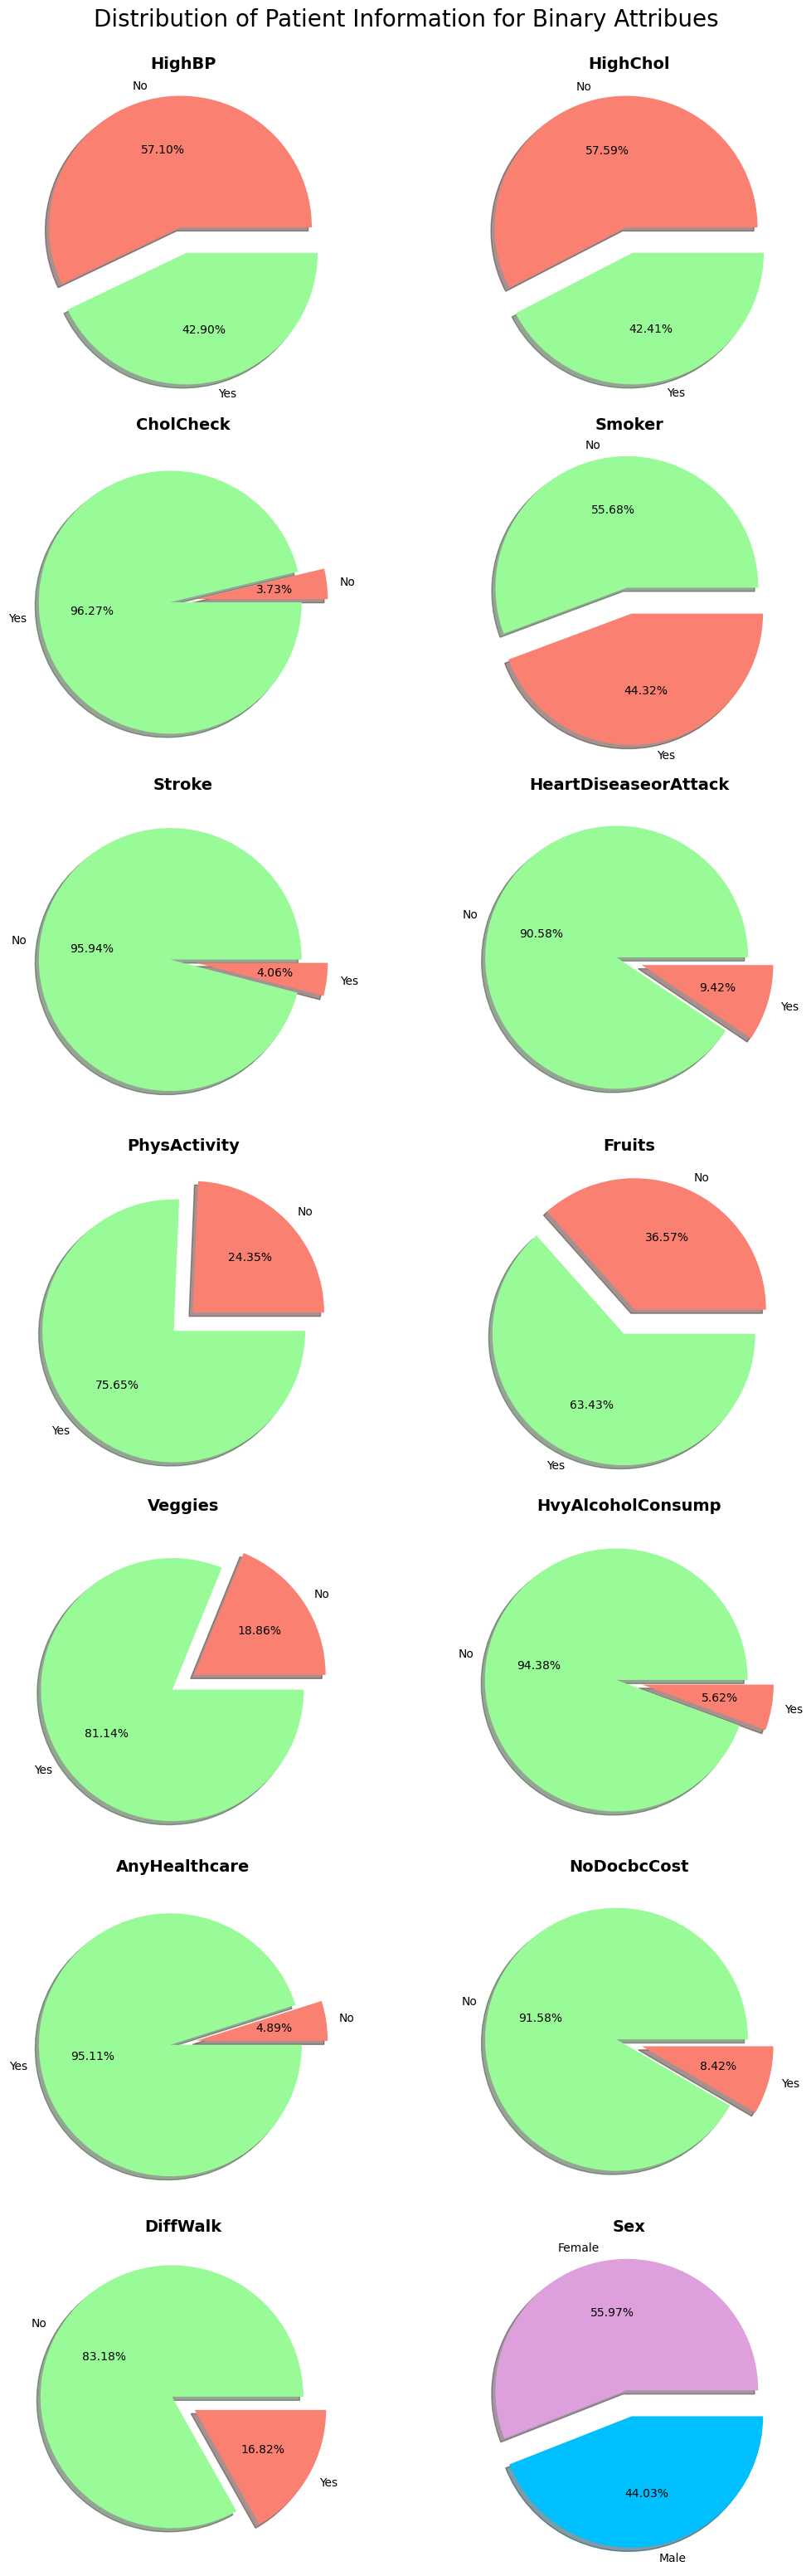

In [35]:
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 31))

#wedge_properties = {'linewidth': 1, 'edgecolor': "black"}

good_colors = ['salmon', 'palegreen']
bad_colors  = ['palegreen', 'salmon']

for col, ax in zip(binary_cols, axs.flat):
    grouped_v = X.groupby([col])[col].count().transform(lambda x: x / x.sum() * 100)

    label_val = grouped_v.index.map({0:'No',1:'Yes'})

    if col in ['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'DiffWalk', 'NoDocbcCost']:
        color_set = bad_colors
    elif col == 'Sex':
        color_set = ['plum', 'deepskyblue']
        label_val = grouped_v.index.map({0:'Female',1:'Male'})
    else:
        color_set = good_colors

    
    texts, autotexts, wedges = ax.pie(grouped_v,
                                      labels=label_val,
                                      #labeldistance=-0.2,
                                      shadow=True, explode=[0.1, 0.1],
                                      #colors = ['tomato', 'palegreen'],
                                      colors = color_set,
                                      startangle=0,
                                      #wedgeprops=wedge_properties,
                                      autopct='%1.2f%%',
                                    )
    ax.set_title(col, size=14, weight="bold", y=1, x = 0.5)

plt.suptitle('Distribution of Patient Information for Binary Attribues', fontsize=20, y=1)
plt.tight_layout()
plt.show()

#### GenHlth - Attribute rates the Patient's General Health from a scale of 1 to 5
Scale values are : 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor

In [36]:
# First, summarize the PhysActivity column and calculate the % of data split between the five values 
# (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)

grouped_v = X.groupby(['GenHlth'])['GenHlth'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

GenHlth
1    17.856749
2    35.116682
3    29.819458
4    12.444812
5     4.762299
Name: GenHlth, dtype: float64

In [37]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor'}).to_list()
label_v

['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

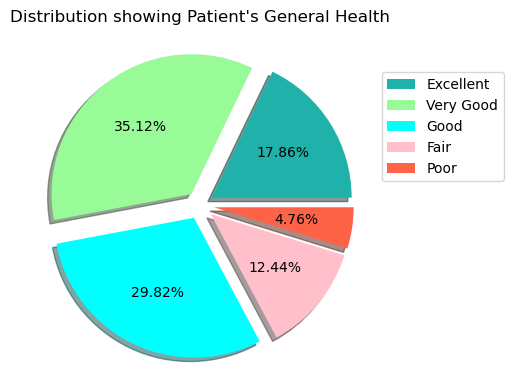

In [38]:
# Next is to visualizing the attribute if Patient is a Smoker

# Create a colormap for green shades
#green_cmap = plt.cm.Greens

# Create a colormap for red shades
#red_cmap = plt.cm.Reds

# Generate colors for each slice
#colors_v = [green_cmap(i) for i in np.linspace(0.8, 0.2, len(label_v))]

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  startangle=0,
                  colors = ['lightseagreen', 'palegreen', 'cyan', 'pink', 'tomato'],
                  #colors = plt.cm.Pastel2.colors,
                  shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Patient\'s General Health')
plt.tight_layout()
plt.show()

#### Education - Attribute to show Patient's Education from a scale of 1 to 6
1 = Never attended school or only kindergarten \
2 = Grades 1 through 8 (Elementary) \
3 = Grades 9 through 11 (Some high school) \
4 = Grade 12 or GED (High school graduate) \
5 = College 1 year to 3 years (Some college or technical school) \
6 = College 4 years or more (College graduate)

In [39]:
# First, summarize the PhysActivity column and calculate the % of data split between the six values 
# see details above for scale 1-6

grouped_v = X.groupby(['Education'])['Education'].count()
grouped_v

Education
1       174
2      4043
3      9478
4     62750
5     69910
6    107325
Name: Education, dtype: int64

In [40]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({1:'None or Kindergarten', 2:'Grades 1 - 8', 3:'Grades 9 - 11', 
                               4:'Grade 12 or GED', 5:'College 1-3 Years', 6 : 'College 4 or more Years'}).to_list()
label_v

['None or Kindergarten',
 'Grades 1 - 8',
 'Grades 9 - 11',
 'Grade 12 or GED',
 'College 1-3 Years',
 'College 4 or more Years']

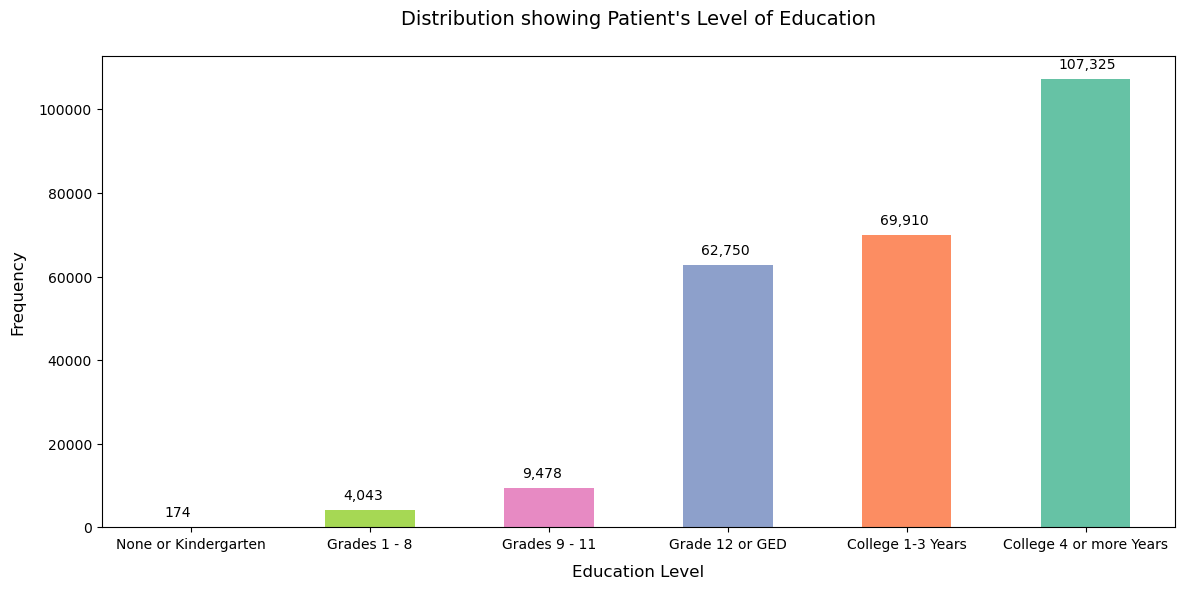

In [41]:
# Next is to visualizing the attribute if Patient is a Smoker

lv_len = len(label_v)

ax = grouped_v.plot(kind='bar', figsize=(12,6), color = plt.cm.Set2.colors[:lv_len][::-1])
plt.title('Distribution showing Patient\'s Level of Education', fontsize=14, y=1.05)
plt.xticks(range(lv_len),label_v, rotation = 0)
for index,data in enumerate(grouped_v):
    plt.text(x=index - .15 , y =data+2500 , s=f"{data:,}" , fontdict=dict(fontsize=10))
plt.xlabel('Education Level', labelpad=10, fontsize=12)
plt.ylabel('Frequency', labelpad=10, fontsize=12)
plt.tight_layout()
plt.show()

#### Income - Attribute provides Patient's Income level from a scale of 1 to 8
1 = less than \\$10,000 \
2 = less than \\$15,000 \
3 = less than \\$20,000 \
4 = less than \\$25,000 \
5 = less than \\$35,000 \
6 = less than \\$50,000 \
7 = less than \\$75,000 \
8 = \$75,000 or more

Refer to Page 23 in this document for INCOME2 scale \
https://www.cdc.gov/brfss/annual_data/2014/pdf/CODEBOOK14_LLCP.pdf (refer to page 23)

In [42]:
# First, summarize the PhysActivity column and calculate the % of data split between the six values 
# see details above for scale 1-6

grouped_v = X.groupby(['Income'])['Income'].count()
grouped_v

Income
1     9811
2    11783
3    15994
4    20135
5    25883
6    36470
7    43219
8    90385
Name: Income, dtype: int64

In [43]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({1:'less than $10k', 2 : '10k to $15k', 3:'15k to $20k', 4:'20k to $25k',
                               5:'25k to $35k', 6 : '35k to $50k', 7:'50k to $75k', 8:'$75k or more', }).to_list()
label_v

['less than $10k',
 '10k to $15k',
 '15k to $20k',
 '20k to $25k',
 '25k to $35k',
 '35k to $50k',
 '50k to $75k',
 '$75k or more']

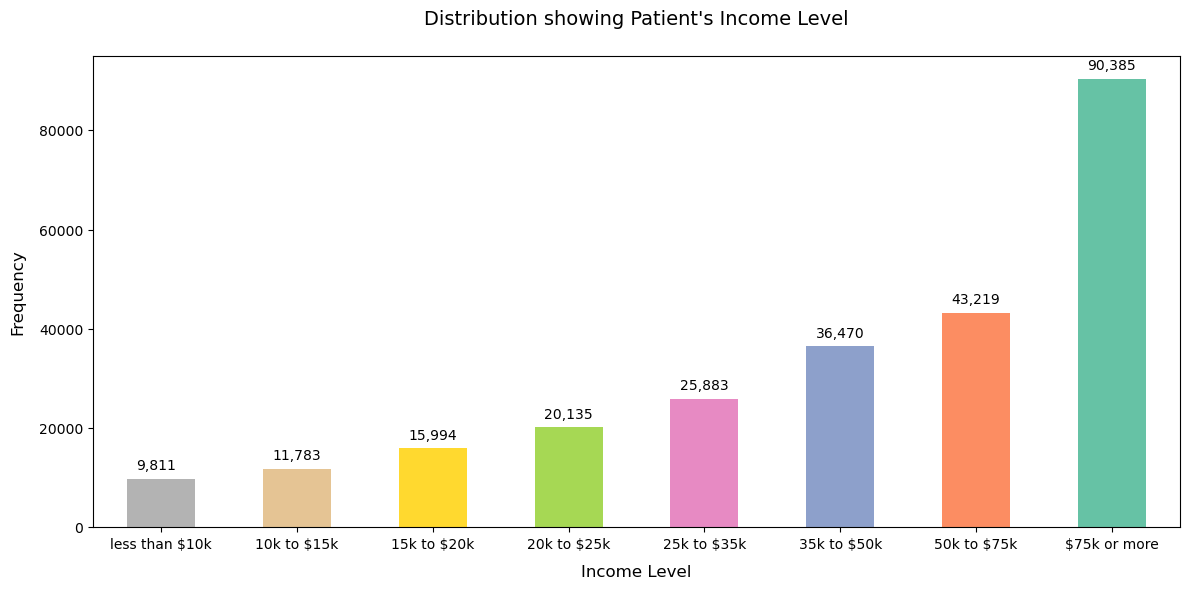

In [44]:
# Next is to visualizing the attribute if Patient is a Smoker

lv_len = len(label_v)

ax = grouped_v.plot(kind='bar', figsize=(12,6), color = plt.cm.Set2.colors[:lv_len][::-1])
plt.title('Distribution showing Patient\'s Income Level', fontsize=14, y=1.05)
plt.xticks(range(lv_len),label_v, rotation = 0)
for index,data in enumerate(grouped_v):
    plt.text(x=index - .18 , y =data+1800 , s=f"{data:,}" , fontdict=dict(fontsize=10))
plt.xlabel('Income Level', labelpad=10, fontsize=12)
plt.ylabel('Frequency', labelpad=10, fontsize=12)
plt.tight_layout()
plt.show()

#### Age - Attribute provides Patient's Age level from a scale of 1 to 13
```
1  = Age 18 to 24       2 = Age 25 to 29      3  = Age 30 to 34       4 = Age 35 to 39 \
5  = Age 40 to 44       6 = Age 45 to 49      7  = Age 50 to 54       8 = Age 55 to 59 \
9  = Age 60 to 64      10 = Age 65 to 69     11  = Age 70 to 74      12 = Age 75 to 79 \
13 = Age 80 or older
```
Refer to Page 101 in this document for _AGEG5YR scale \
https://www.cdc.gov/brfss/annual_data/2014/pdf/CODEBOOK14_LLCP.pdf \

In [45]:
# First, summarize the PhysActivity column and calculate the % of data split between the six values 
# see details above for scale 1-6

grouped_v = X.groupby(['Age'])['Age'].count()
grouped_v

Age
1      5700
2      7598
3     11123
4     13823
5     16157
6     19819
7     26314
8     30832
9     33244
10    32194
11    23533
12    15980
13    17363
Name: Age, dtype: int64

In [46]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({1:'Age 18 to 24',  2 : 'Age 25 to 29',  3:'Age 30 to 34',  4:'Age 35 to 39',
                               5:'Age 40 to 44',  6 : 'Age 45 to 49',  7:'Age 50 to 54',  8:'Age 55 to 59', 
                               9:'Age 60 to 64', 10 : 'Age 65 to 69', 11:'Age 70 to 74', 12:'Age 75 to 79', 13:'Age 80 or older',
                              }).to_list()
label_v

['Age 18 to 24',
 'Age 25 to 29',
 'Age 30 to 34',
 'Age 35 to 39',
 'Age 40 to 44',
 'Age 45 to 49',
 'Age 50 to 54',
 'Age 55 to 59',
 'Age 60 to 64',
 'Age 65 to 69',
 'Age 70 to 74',
 'Age 75 to 79',
 'Age 80 or older']

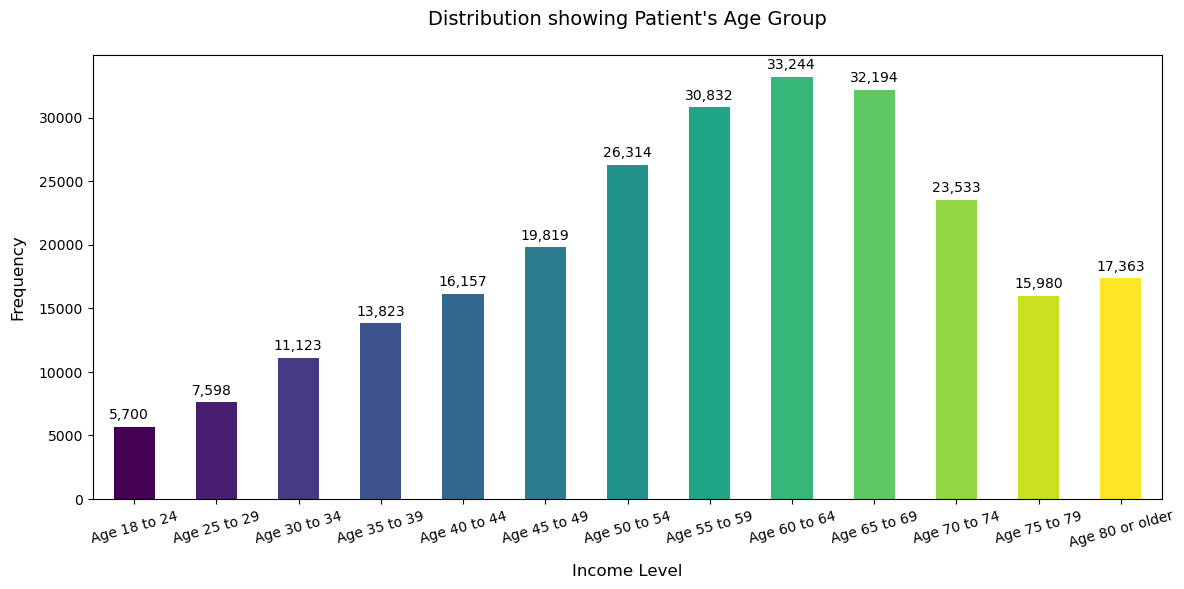

In [47]:
# Next is to visualizing the attribute if Patient is a Smoker

lv_len = len(label_v)

color_scheme = plt.cm.viridis(np.linspace(0, 1, lv_len))

ax = grouped_v.plot(kind='bar', figsize=(12,6), 
                    color = color_scheme,
                    #color = plt.cm.tab20c.colors[:lv_len]
                   )
plt.title('Distribution showing Patient\'s Age Group', fontsize=14, y=1.05)
plt.xticks(range(lv_len),label_v, rotation = 15)
for index,data in enumerate(grouped_v):
    plt.text(x=index - .3 , y =data+600 , s=f"{data:,}" , fontdict=dict(fontsize=10))
plt.xlabel('Income Level', labelpad=10, fontsize=12)
plt.ylabel('Frequency', labelpad=10, fontsize=12)
plt.tight_layout()
plt.show()

In [48]:
df_original = pd.DataFrame(cdc_diabetes_health_indicators.data.original)
df_original.drop('ID', axis = 1, inplace=True)
df_original.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)
df_original

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0              0       1         1          1   40       1       0   
1              0       0         0          0   25       1       0   
2              0       1         1          1   28       0       0   
3              0       1         0          1   27       0       0   
4              0       1         1          1   24       0       0   
...          ...     ...       ...        ...  ...     ...     ...   
253675         0       1         1          1   45       0       0   
253676         1       1         1          1   18       0       0   
253677         0       0         0          1   28       0       0   
253678         0       1         0          1   23       0       0   
253679         1       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0             0       0  ...              1   
1                          0             1       0  ...              0   
2                          0             0       1  ...              1   
3                          0             1       1  ...              1   
4                          0             1       1  ...              1   
...                      ...           ...     ...  ...            ...   
253675                     0             0       1  ...              1   
253676                     0             0       0  ...              1   
253677                     0             1       1  ...              1   
253678                     0             0       1  ...              1   
253679                     1             1       1  ...              1   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0                 0        5        18        15         1    0    9   
1                 1        3         0         0         0    0    7   
2                 1        5        30        30         1    0    9   
3                 0        2         0         0         0    0   11   
4                 0        2         3         0         0    0   11   
...             ...      ...       ...       ...       ...  ...  ...   
253675            0        3         0         5         0    1    5   
253676            0        4         0         0         1    0   11   
253677            0        1         0         0         0    0    2   
253678            0        3         0         0         0    1    7   
253679            0        2         0         0         0    0    9   

        Education  Income  
0               4       3  
1               6       1  
2               4       8  
3               3       6  
4               5       4  
...           ...     ...  
253675          6       7  
253676          2       4  
253677          5       2  
253678          5       1  
253679          6       2  

[253680 rows x 22 columns]

In [49]:
income_labels = ['less than $10k', '10k to $15k', '15k to $20k', '20k to $25k',
                 '25k to $35k',    '35k to $50k', '50k to $75k', '$75k or more']

age_labels = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
              'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 
              'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

edu_labels = ['None or Kindergarten', 'Grades 1 - 8',      'Grades 9 - 11', 
              'Grade 12 or GED',      'College 1-3 Years', 'College 4 or more Years']

#### BMI attribute - Data Analysis

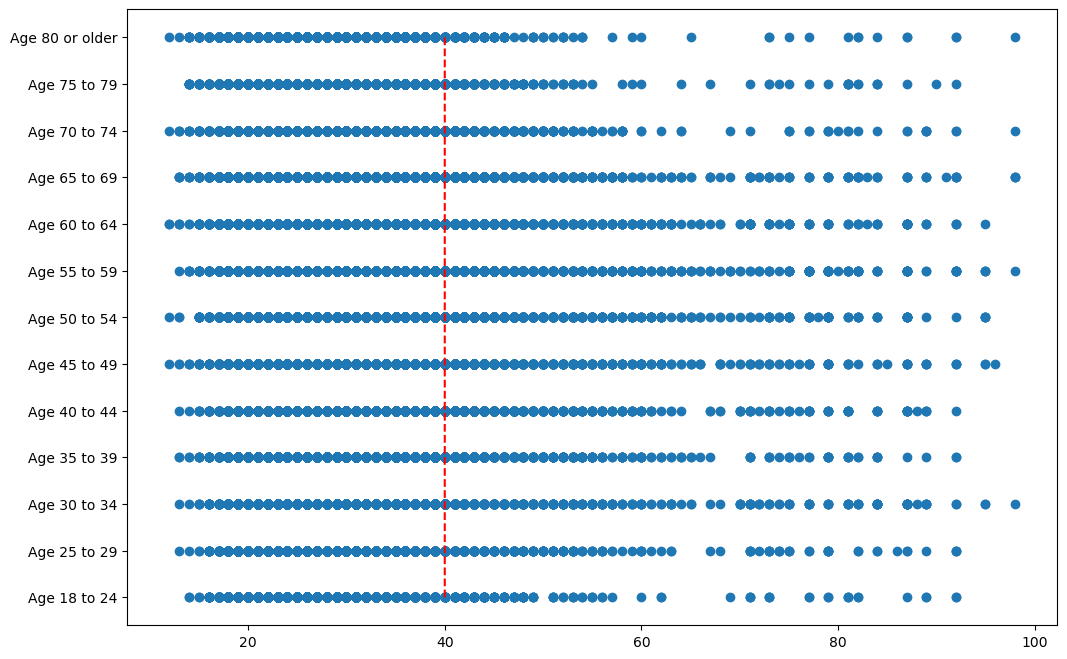

In [50]:
# Let's display to the scatter plot for BMI against Age values

fig = plt.figure(figsize=(12, 8))
plt.scatter(x=X['BMI'], y=X['Age'])
plt.yticks(range(1, len(age_labels)+1), age_labels)

line = 1*np.linspace(40, 40, X.shape[0])
x_line = np.linspace(1, 13, X.shape[0])
plt.plot(line, x_line, 'k--', color = 'r')
plt.show()

***There are many records with a BMI value above 40. A normal adult will have their BMI range between 18.5 and 40. Any value above 40 would be an anomoly.***

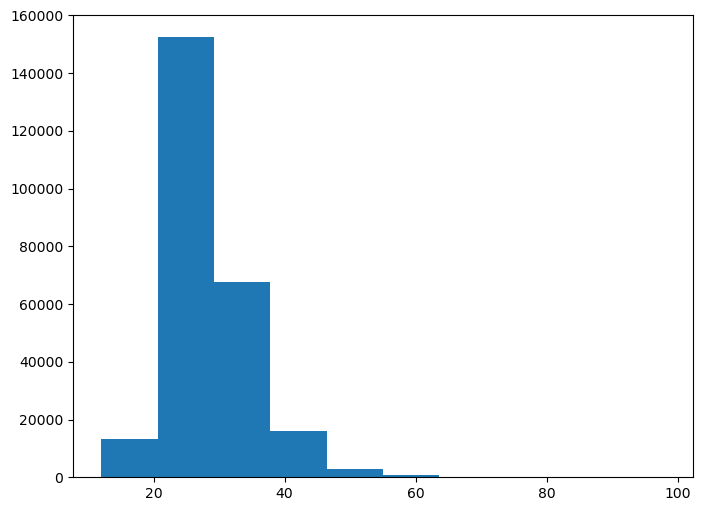

In [51]:
# Let's plot a histogram to see how many values are beyond 40
fig = plt.figure(figsize=(8, 6))
X['BMI'].hist(grid=False)
plt.show()

In [52]:
# There are a few records that are beyond 40. Let's explore further using a pie chart
# To do this, we will have to create a groupby and call all values 40 or less to be Good and anything above 40 as Bad

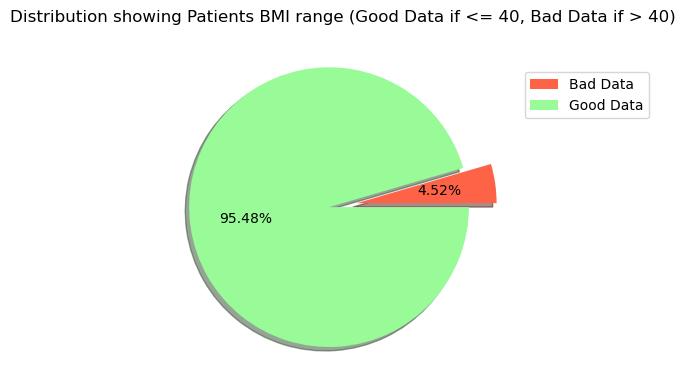

In [53]:
#bmi_data = pd.cut(X['BMI'], bins=[0, 45, 100], labels=['Good', 'Bad'])
bmi_data = X.groupby(X['BMI'].apply(lambda x: 'Good Data' if x <= 40 else 'Bad Data'))
grouped_v = bmi_data['BMI'].count().transform(lambda   x: x / x.sum() * 100)

# Next is to visualizing the attribute for BMI

color_v = grouped_v.index.map({'Good Data':'palegreen','Bad Data':'tomato'})

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  #labels = label_v,
                  startangle=0,
                  colors = color_v,
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Patients BMI range (Good Data if <= 40, Bad Data if > 40)')
plt.tight_layout()
plt.show()

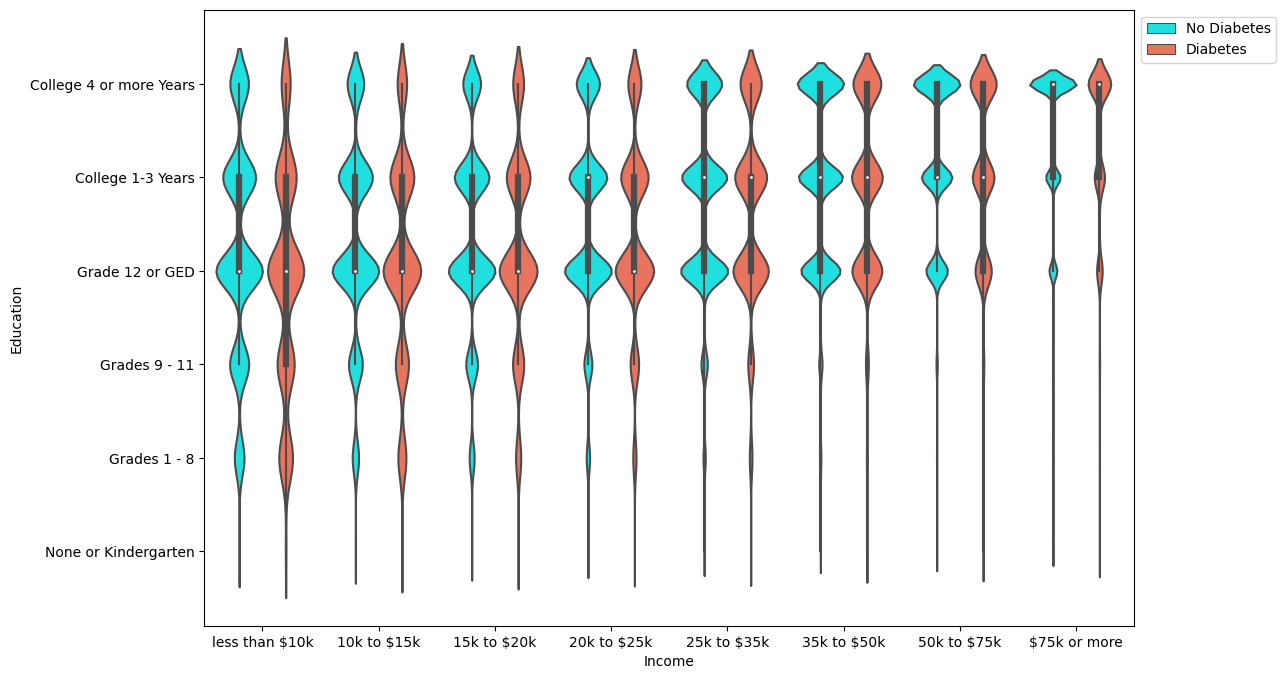

In [54]:
# Let's display to the violin plot for Income and Education against target values - Diabetes

fig = plt.figure(figsize=(12, 8))
ax = sns.violinplot(data=df_original, x='Income', y='Education', hue='Diabetes', palette={0:'cyan', 1:'tomato'})

ax.legend(bbox_to_anchor=(1, 1),loc='upper left', handles=ax.legend_.legendHandles, labels = ['No Diabetes', 'Diabetes'])


plt.xticks(range(len(income_labels)), income_labels)
plt.yticks(range(1, len(edu_labels)+1), edu_labels)

plt.show()

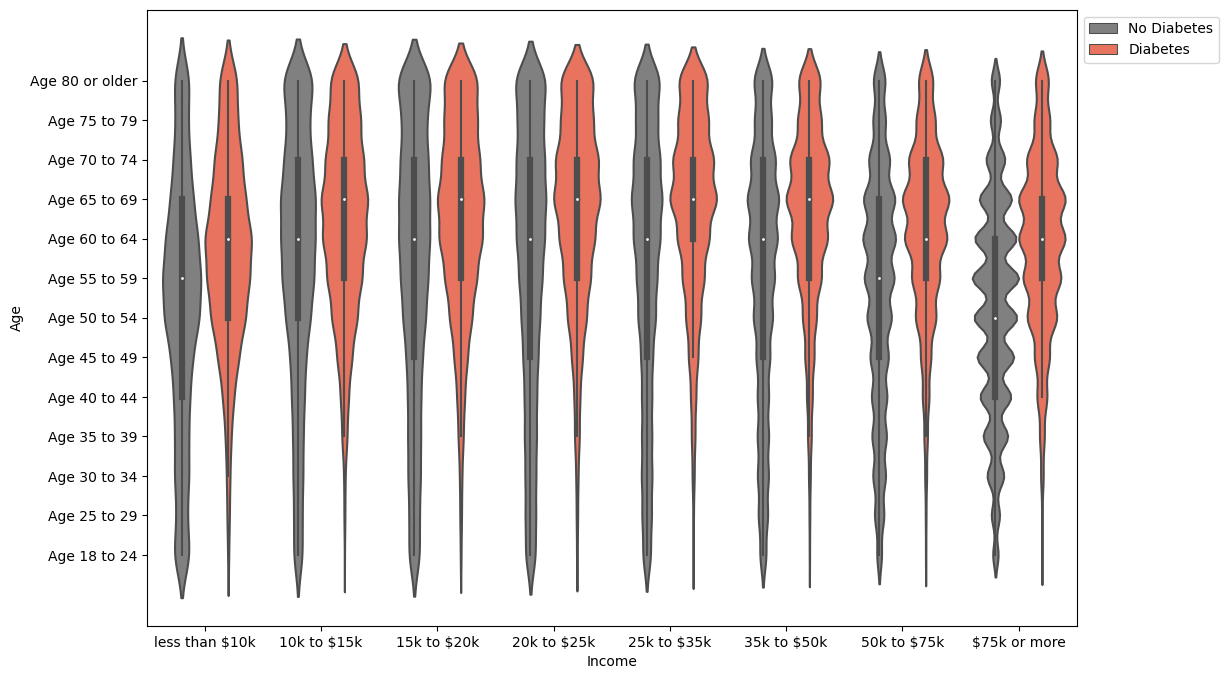

In [55]:
# Let's display to the violin plot for Income and Age against target values - Diabetes

fig = plt.figure(figsize=(12, 8))

ax = sns.violinplot(data=df_original, x='Income', y='Age', hue='Diabetes', palette=['grey','tomato'])

ax.legend(bbox_to_anchor=(1, 1),loc='upper left', handles=ax.legend_.legendHandles, labels = ['No Diabetes', 'Diabetes'])

plt.xticks(range(len(income_labels)), income_labels)
plt.yticks(range(1, len(age_labels)+1), age_labels)

plt.show()

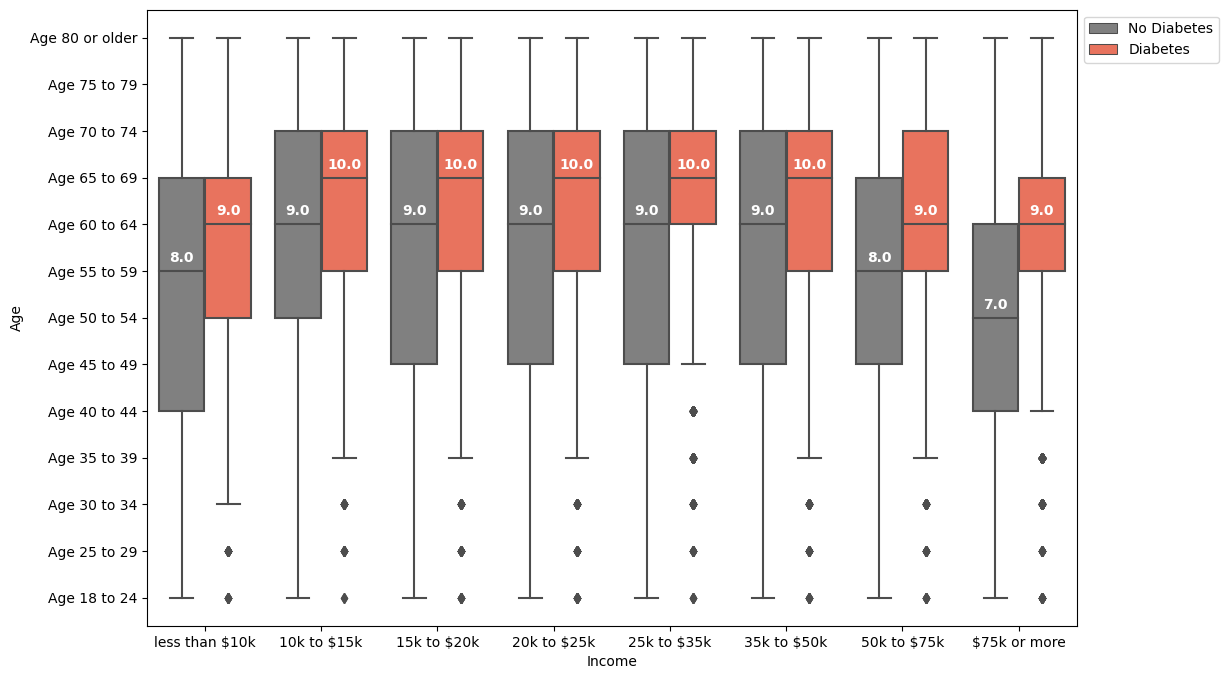

In [56]:
# Let's display to the Box plot for Income and Age against target values - Diabetes

fig = plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df_original, x='Income', y='Age', hue='Diabetes', palette=['grey','tomato'])

ax.legend(bbox_to_anchor=(1, 1),loc='upper left', handles=ax.legend_.legendHandles, labels = ['No Diabetes', 'Diabetes'])
medians = df_original.groupby(['Income', 'Diabetes'])['Age'].median().values

ind = 0

for tick in range(len(ax.get_xticklabels())):
    #left side value is medians_label[ind]; median + 0.2 is to move the value up; tick - 0.2 is to shift left from center
    ax.text(tick-.2, medians[ind] + 0.2, medians[ind], horizontalalignment='center', color='w', weight='semibold')

    #right side value is medians_label[ind+1]; median + 0.2 is to move the value up; tick + 0.2 is to shift right from center
    ax.text(tick+.2, medians[ind+1] + 0.2, medians[ind+1],  horizontalalignment='center',  color='w', weight='semibold')

    ind += 2 # to move the medians list by 2 as we have two values for each income group

plt.xticks(range(len(income_labels)), income_labels)
plt.yticks(range(1, len(age_labels)+1), age_labels)

plt.show()

In [57]:
# Let's display to the Box plot for Income and BMI against target values - Diabetes

fig = plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df_original, x='Income', y='BMI', hue='Diabetes', palette=['grey','tomato'])

ax.legend(bbox_to_anchor=(1, 1),loc='upper left', handles=ax.legend_.legendHandles, labels = ['No Diabetes', 'Diabetes'])
medians = df_original.groupby(['Income', 'Diabetes'])['BMI'].median().values

ind = 0

for tick in range(len(ax.get_xticklabels())):
    #left side value is medians_label[ind]; median + 0.2 is to move the value up; tick - 0.2 is to shift left from center
    ax.text(tick-.2, medians[ind] + 0.2, medians[ind], horizontalalignment='center', color='w', weight='semibold')

    #right side value is medians_label[ind+1]; median + 0.2 is to move the value up; tick + 0.2 is to shift right from center
    ax.text(tick+.2, medians[ind+1] + 0.2, medians[ind+1],  horizontalalignment='center',  color='w', weight='semibold')

    ind += 2 # to move the medians list by 2 as we have two values for each income group

plt.xticks(range(len(income_labels)), income_labels)
#yticks will be the min and max values of BMI scores

plt.show()

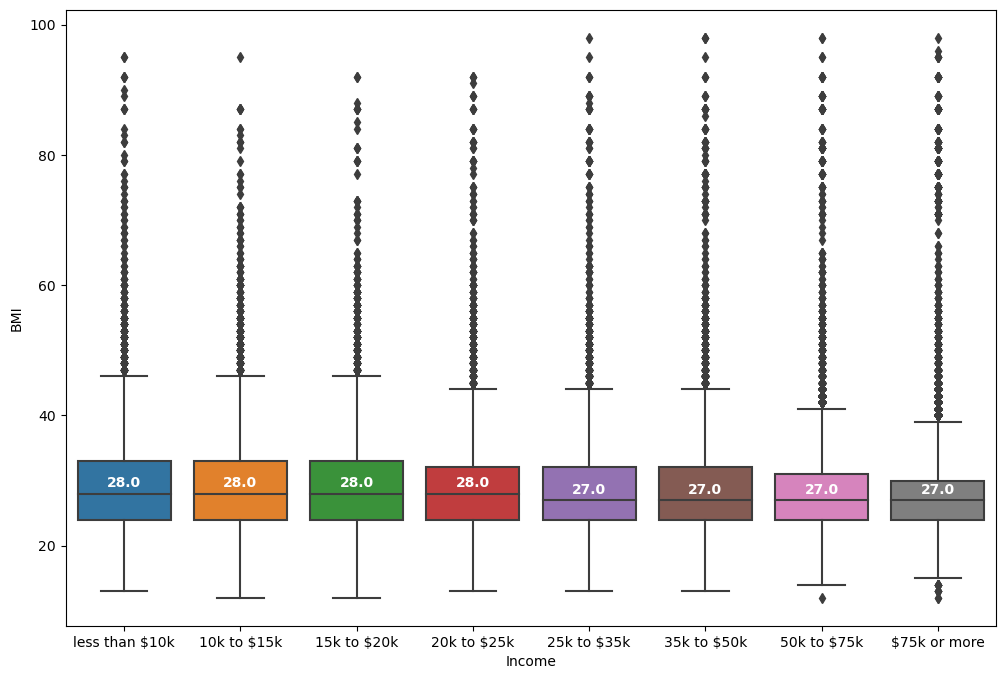

In [58]:
# Let's display the Box plot for Income against BMI

fig = plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df_original, x='Income', y='BMI')

medians = df_original.groupby(['Income'])['BMI'].median().values

for tick in range(len(ax.get_xticklabels())):
    ax.text(tick, medians[tick] + 1, medians[tick], horizontalalignment='center', color='w', weight='semibold')

plt.xticks(range(len(income_labels)), income_labels)
#yticks will be the min and max values of BMI scores

plt.show()

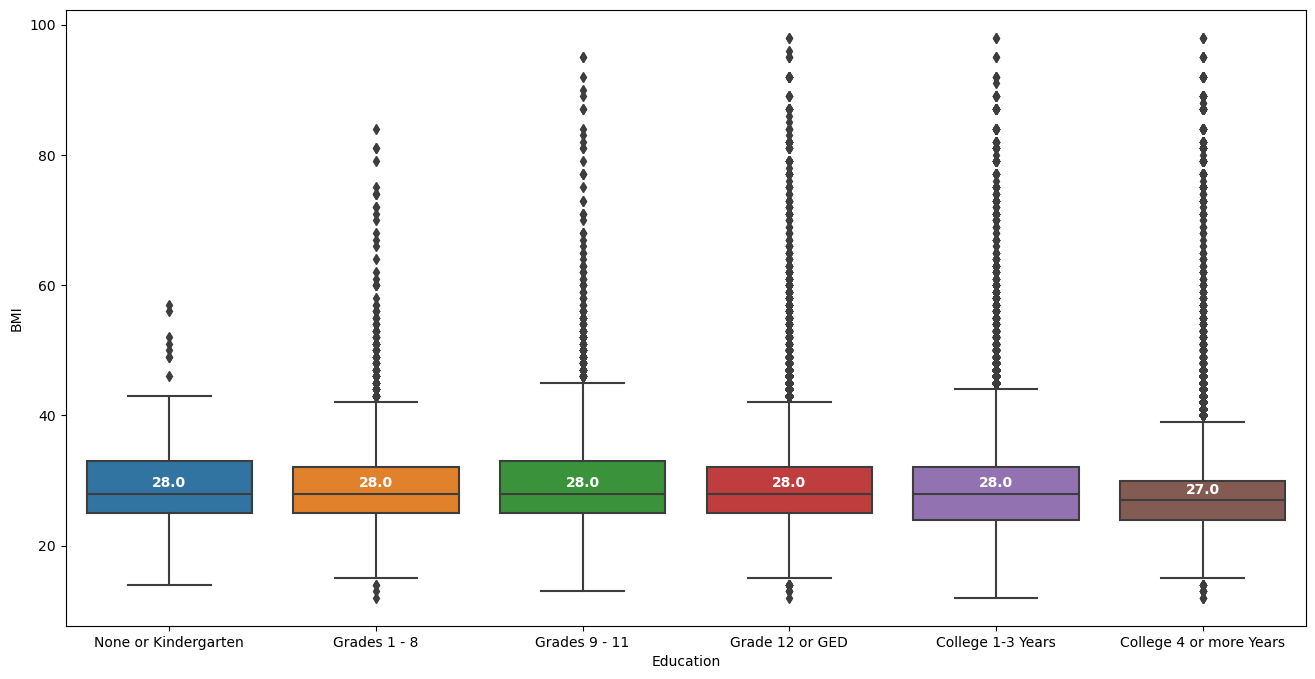

In [59]:
# Let's display the Box plot for Income against BMI

fig = plt.figure(figsize=(16, 8))

ax = sns.boxplot(data=df_original, x='Education', y='BMI')

medians = df_original.groupby(['Education'])['BMI'].median().values

for tick in range(len(ax.get_xticklabels())):
    ax.text(tick, medians[tick] + 1, medians[tick], horizontalalignment='center', color='w', weight='semibold')

plt.xticks(range(len(edu_labels)), edu_labels)
#yticks will be the min and max values of BMI scores

plt.show()

In [60]:
# Let's display the Box plot for Income against BMI

fig = plt.figure(figsize=(16, 8))

ax = sns.boxplot(data=df_original, x='Age', y='BMI')

medians = df_original.groupby(['Age'])['BMI'].median().values

for tick in range(len(ax.get_xticklabels())):
    ax.text(tick, medians[tick] + 1, medians[tick], horizontalalignment='center', color='w', weight='semibold')

plt.xticks(range(len(age_labels)), age_labels,rotation=15)
#yticks will be the min and max values of BMI scores

plt.show()

In [61]:
# Let's create a HeatMap to correlate all the numerical datasets

plt.figure(figsize=(16,16))
corr = df_original.corr()
sns.heatmap(corr, annot=True, cmap='flare')
plt.title('Patient Data : Pearson\'s Correlation Matrix', fontsize = 20, y=1.02)
plt.tight_layout()
plt.show()

In [62]:
# Let's create a HeatMap to correlate all the numerical datasets

plt.figure(figsize=(16,16))
corr = df_original.corr()
matrix = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask = matrix, cmap='flare')
plt.title('Patient Data : Pearson\'s Correlation Matrix', fontsize = 20, y=1.02)
plt.tight_layout()
plt.show()

In [63]:
# Let's create a HeatMap to correlate all the numerical datasets for Male Patients

df_males = df_original[df_original['Sex']== 1]

df_males.drop('Sex', axis=1, inplace=True)

plt.figure(figsize=(16,16))
corr = df_males.corr()
sns.heatmap(corr, annot=True, cmap='flare')
plt.title('Patient Data : Pearson\'s Correlation Matrix for Male Patients', fontsize = 20, y=1.02)
plt.tight_layout()
plt.show()

In [64]:
# Let's create a HeatMap to correlate all the numerical datasets for Female Patients

df_females = df_original[df_original['Sex']== 0]

df_females.drop('Sex', axis=1, inplace=True)

plt.figure(figsize=(16,16))
corr = df_females.corr()
sns.heatmap(corr, annot=True, cmap='flare')
plt.title('Patient Data : Pearson\'s Correlation Matrix for Female Patients', fontsize = 20, y=1.02)
plt.tight_layout()
plt.show()

In [65]:
Xf = X[X['Sex']== 0]  # X_female
Xm = X[X['Sex']== 1]  # X_male

Xf.drop('Sex', axis=1, inplace=True)
Xm.drop('Sex', axis=1, inplace=True)

In [66]:
ym = y.loc[Xm.index]  # y female
yf = y.loc[Xf.index]  # y male

In [67]:
Xm.shape, ym.shape

((111706, 20), (111706, 1))

In [68]:
Xf.shape, yf.shape

((141974, 20), (141974, 1))

In [69]:
# Let's create a list of all binary columns and build a pie plot grid to show the 

binary_cols = [col for col in Xf.columns if Xf[col].nunique() == 2]
print (binary_cols)

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']


In [70]:
cols_detailed = ['High BP', 'High Cholesterol', 'Cholesterol Check in last 5 Years', 
                 'Is a Smoker', 'Had a Stroke', 'Had a Heart Disease or Attack', 
                 'Physical Activity in last 30 days', 'Consumed Fruits', 'Consumed Veggies', 
                 'Heavy Alcohol Consumption', 'Any Healthcare Issues', 
                 'No Doctor Visit due to Cost', 'Difficulty in Walking']

In [71]:
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(16, 16))

good_colors = ['salmon', 'palegreen']
bad_colors  = ['palegreen', 'salmon']

# Let's parse two columns at the same time and build the male and female comparison on the left side and right side.
# col 1 will have male for attribute odd  number attributes, col 2 will have female for attribute odd  number attributes,
# col 3 will have male for attribute even number attributes, col 4 will have female for attribute even number attributes

for i, col_1, col_2 in zip(range(len(binary_cols)//2),binary_cols[0::2], binary_cols[1::2]):
    grouped_vm_1 = Xm.groupby([col_1])[col_1].count().transform(lambda   x: x / x.sum() * 100)
    grouped_vf_1 = Xf.groupby([col_1])[col_1].count().transform(lambda x: x / x.sum() * 100)

    grouped_vm_2 = Xm.groupby([col_2])[col_2].count().transform(lambda   x: x / x.sum() * 100)
    grouped_vf_2 = Xf.groupby([col_2])[col_2].count().transform(lambda x: x / x.sum() * 100)

    
    label_val_m1 = grouped_vm_1.index.map({0:'No',1:'Yes'})
    label_val_f1 = grouped_vf_1.index.map({0:'No',1:'Yes'})

    label_val_m2 = grouped_vm_2.index.map({0:'No',1:'Yes'})
    label_val_f2 = grouped_vm_2.index.map({0:'No',1:'Yes'})
    
    if col_1 in ['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'DiffWalk', 'NoDocbcCost']:
        color_set_1 = bad_colors
    else:
        color_set_1 = good_colors

    if col_2 in ['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'DiffWalk', 'NoDocbcCost']:
        color_set_2 = bad_colors
    else:
        color_set_2 = good_colors

    texts, autotexts, wedges = axs[i,0].pie(grouped_vm_1,
                                      labels=label_val_m1,
                                      shadow=True, explode=[0.1, 0.1],
                                      colors = color_set_1,
                                      startangle=0,
                                      autopct='%1.2f%%',
                                    )
    axs[i,0].set_title(cols_detailed[(i*2)], size=14, weight="bold", y=1, x = 1.5)

    texts, autotexts, wedges = axs[i,1].pie(grouped_vf_1,
                                      labels=label_val_f1,
                                      shadow=True, explode=[0.1, 0.1],
                                      colors = color_set_1,
                                      startangle=0,
                                      autopct='%1.2f%%',
                                    )

    texts, autotexts, wedges = axs[i,2].pie(grouped_vm_2,
                                      labels=label_val_m2,
                                      shadow=True, explode=[0.1, 0.1],
                                      colors = color_set_2,
                                      startangle=0,
                                      autopct='%1.2f%%',
                                    )
    axs[i,2].set_title(cols_detailed[(i*2)+1], size=14, weight="bold", y=1, x = 1.5)

    texts, autotexts, wedges = axs[i,3].pie(grouped_vf_2,
                                      labels=label_val_f2,
                                      shadow=True, explode=[0.1, 0.1],
                                      colors = color_set_2,
                                      startangle=0,
                                      autopct='%1.2f%%',
                                    )


col_1 = binary_cols[-1]
grouped_vm_1 = Xm.groupby([col_1])[col_1].count().transform(lambda x: x / x.sum() * 100)
grouped_vf_1 = Xf.groupby([col_1])[col_1].count().transform(lambda x: x / x.sum() * 100)

texts, autotexts, wedges = axs[6,0].pie(grouped_vm_1,
                                      labels=label_val_m1,
                                      shadow=True, explode=[0.1, 0.1],
                                      colors = bad_colors,
                                      startangle=0,
                                      autopct='%1.2f%%',
                                    )
axs[6,0].set_title(cols_detailed[-1], size=14, weight="bold", y=1, x = 1.5)

texts, autotexts, wedges = axs[6,1].pie(grouped_vf_1,
                                      labels=label_val_f1,
                                      shadow=True, explode=[0.1, 0.1],
                                      colors = bad_colors,
                                      startangle=0,
                                      autopct='%1.2f%%',
                                    )

axs[6, 2].set_visible(False)
axs[6, 3].set_visible(False)

line_1 = 'Distribution of Patient Information for Binary Attribues'
males_txt = 'Males'
females_txt = 'Females'

plt.suptitle(f'{line_1}\n\n{males_txt:<20} {females_txt:>25} {males_txt:>35} {females_txt:>40}',
             fontsize=20, y=1)
plt.tight_layout()
plt.show()

### Data Analysis - Conclusion

#### Data Quality:
We have a large population of data - 253,680 records to work with. There is an good distribution of data between male and female patients (56 - 44%). There are no null values and it helps to apply and train the machine learning models for better performance.

There is a small percentage of BMI data that are outside the normal ranges. 4.5% of the data is bad (BMI greater than 40) with some of them reaching closer to 100. Since this is a small portion, we should be OK to keep this for model evaluation. The median BMI shows as 28 which is a bit higher than normal rates. Since we are analyzing Diabetes Health, this data should be OK for modeling.

#### Data Distribution and Correlation:
Based on the analysis between Males and Females, a higher percentage of men smoke or have heart disease or heart attack.
Women seem to be more healthier than Men.

In general, most of the population have healthcare, can afford to visit a doctor, and periodically get their cholesterol checked.

The Pearson's Correlation shows that there are only a few attributes that have a strong correlation to the target variable (Diabetes). Some of the attributes do not have any correlation and we may be able to eliminate them. Further analysis is required to determine the attribute elimination.

## Feature Engineering

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans

In [73]:
# Let's look at the original dataset from X and y
X.shape, y.shape

((253680, 21), (253680, 1))

### Principal Component Analysis

In [74]:
X_std = StandardScaler().fit_transform(X)

In [75]:
# creating a pca object and specifying the number of principal components, here PCA = 3
pca_3 = PCA(n_components=3) 

# applying fit and transforming x
principalComponents = pca_3.fit_transform(X_std)

principalComponents

array([[ 4.77636474,  0.42711452,  0.33894097],
       [ 0.57043258,  5.52323229, -1.38884608],
       [ 4.9408701 ,  1.78492942,  1.9760563 ],
       ...,
       [-1.3072151 ,  1.71767506, -0.10476784],
       [ 0.46384491,  0.06283722, -0.29110073],
       [ 0.7850542 , -1.57965702, -0.29195238]])

In [76]:
# Find out the Explained Variance Ratio for PCA = 3
pca_3.explained_variance_ratio_

array([0.16713003, 0.0839446 , 0.06463552])

In Principal Component Analysis (PCA), the explained variance ratio is a metric that measures the amount of variance in a dataset that each principal component explains. It's used to evaluate the usefulness of the principal components and to decide how many to use in a model.

In [77]:
print (f'The Explained Variance Ratio is {round((pca_3.explained_variance_ratio_.sum()*100),2)}')

The Explained Variance Ratio is 31.57


In [78]:
# specifying the number of components
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA_1', 'PCA_2', 'PCA_3'])

# concatenating the target values and the new principal components

finalDf = pd.concat([principalDf, y], axis = 1)

In [79]:
# Visualization of the PCA 

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 8)
ax.set_ylabel('Principal Component 2', fontsize = 8)
ax.set_zlabel('Principal Component 3', fontsize = 8)
ax.set_title('3D component PCA - Diabetes Heath Indicator', fontsize = 14)
targets = [0,1]
colors = ['lightcyan', 'red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diabetes_binary'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA_1']
               , finalDf.loc[indicesToKeep, 'PCA_2']
               , finalDf.loc[indicesToKeep, 'PCA_3']
               , c = color
               , s = 6
               )


mapping = {0:'No Diabetes',1:'Has Diabetes'}
ax.legend([mapping.get(m, m) for m in targets ])

ax.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize = (12,6))

fig = px.scatter_3d(data_frame=finalDf, 
              x = 'PCA_3', 
              y = 'PCA_2', 
              z = 'PCA_1',
              range_x=[int(finalDf['PCA_1'].min()*0.5),int(finalDf['PCA_1'].max()*.5)], 
              range_y=[int(finalDf['PCA_2'].min()*0.5),int(finalDf['PCA_2'].max()*.5)], 
              range_z=[int(finalDf['PCA_3'].min()*0.5),int(finalDf['PCA_3'].max()*.5)],
              color = 'Diabetes_binary')
fig.update_traces(marker_size = 3)
#fig.layout.scene.aspectratio = {'x':1, 'y':1, 'z':1}
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### Principal Component Analysis for 2 to 20 

In [81]:
# Calculate the Principal Component Analysis explained variance ratio for the total number of columns in X
pn = []

print ('The Explained Variance Ratio for')

X_std = StandardScaler().fit_transform(X)

for n in range (2, len(X.columns)):

    # creating a pca object and specifying the number of principal components
    pca_x = PCA(n_components=n) 

    # applying fit and transforming x
    principalComponents = pca_x.fit_transform(X_std)
    
    pnx = round((pca_x.explained_variance_ratio_.sum()*100),2)
    pn.append(pnx)
    
    print ('PCA={:2} is {:.2f}%'.format(n, pnx))

The Explained Variance Ratio for
PCA= 2 is 25.11%
PCA= 3 is 31.58%
PCA= 4 is 37.24%
PCA= 5 is 42.73%
PCA= 6 is 47.89%
PCA= 7 is 52.83%
PCA= 8 is 57.36%
PCA= 9 is 61.77%
PCA=10 is 65.97%
PCA=11 is 69.83%
PCA=12 is 73.61%
PCA=13 is 77.16%
PCA=14 is 80.65%
PCA=15 is 84.04%
PCA=16 is 87.39%
PCA=17 is 90.56%
PCA=18 is 93.21%
PCA=19 is 95.64%
PCA=20 is 97.99%


In [82]:
# creating a pca object and specifying the number of principal components, here PCA = 3
pca_20 = PCA(n_components=20) 

# applying fit and transforming x
principalComponents = pca_20.fit_transform(X_std)

# Find out the Explained Variance Ratio for PCA = 20
pca_20.explained_variance_ratio_

array([0.16713006, 0.08396704, 0.06480288, 0.05667649, 0.05512874,
       0.05176754, 0.04916833, 0.04515407, 0.04399236, 0.04190459,
       0.03864939, 0.03771927, 0.03557995, 0.03488982, 0.03391184,
       0.03346775, 0.03166342, 0.0265529 , 0.02430867, 0.02348267])

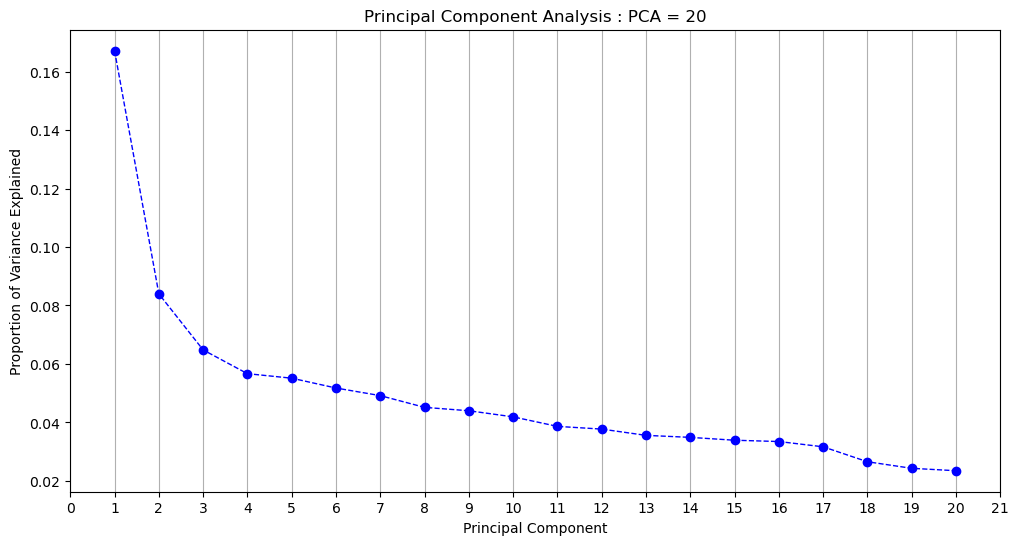

In [83]:
# Plot the Principal Component Analysis graph for PCA = 20
fig = plt.figure(figsize = (12,6))
PC20values = np.arange(pca_20.n_components_) + 1
plt.plot(PC20values, pca_20.explained_variance_ratio_, 'bo--', linewidth=1)
plt.title('Principal Component Analysis : PCA = 20')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.grid(axis='x')
plt.show()

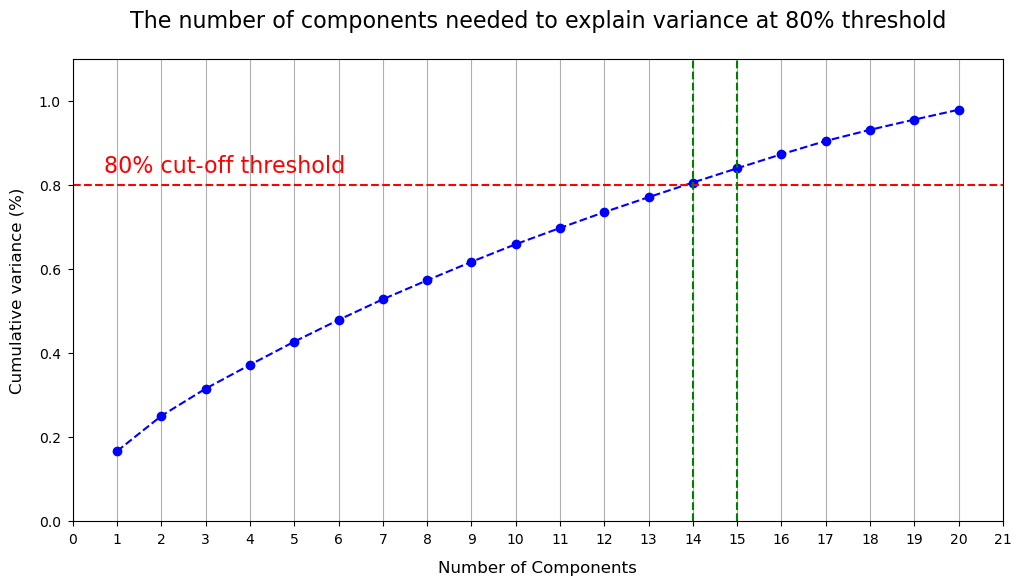

In [84]:
fig, ax = plt.subplots(figsize = (12,6))
xi = np.arange(1, 21, step=1)
yi = np.cumsum(pca_20.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontsize=12, labelpad = 10)
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)',fontsize=12, labelpad = 10)
plt.title('The number of components needed to explain variance at 80% threshold', y = 1.05, fontsize=16)

plt.axhline(y=0.80, color='r', linestyle='--')
plt.axvline(x=14, color='g', linestyle='--')
plt.axvline(x=15, color='g', linestyle='--')
plt.text(0.7, 0.83, '80% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
ax.tick_params(axis='both', which='major', pad=5)
plt.show()

In [85]:
# Convert the PCA information into PCA = 14 into a dataframe for KMeans analysis

X_std = StandardScaler().fit_transform(X)

# creating a pca object and specifying the number of principal components, here PCA = 3
pca_14 = PCA(n_components=14) 

# applying fit and transforming x
principalComponents = pca_14.fit_transform(X_std)

data_pca = pd.DataFrame(data=principalComponents,
                        columns=[f'PC{i}' for i in range(1, 15)])

### Apply k-means++

In [86]:
# create the kmeans df to capture the 
X_kmeans = X.copy()

n_clusters=5
kmeans = KMeans(n_clusters, init='k-means++', random_state=42)
kmeans.fit(data_pca)

# Add the kmeans_cluster column to PCA and kmeans DFs
data_pca['kmeans_cluster'] = kmeans.labels_
X_kmeans['kmeans_cluster'] = kmeans.labels_
print('k-means++ Inertia: {:,.2f}'.format(kmeans.inertia_))

k-means++ Inertia: 3,014,780.92


In the K-means clustering algorithm, inertia is a metric that measures how well a dataset has been clustered. It's calculated by measuring the distance between each data point and its centroid, squaring the distance, and summing the squares for each data point in the cluster.

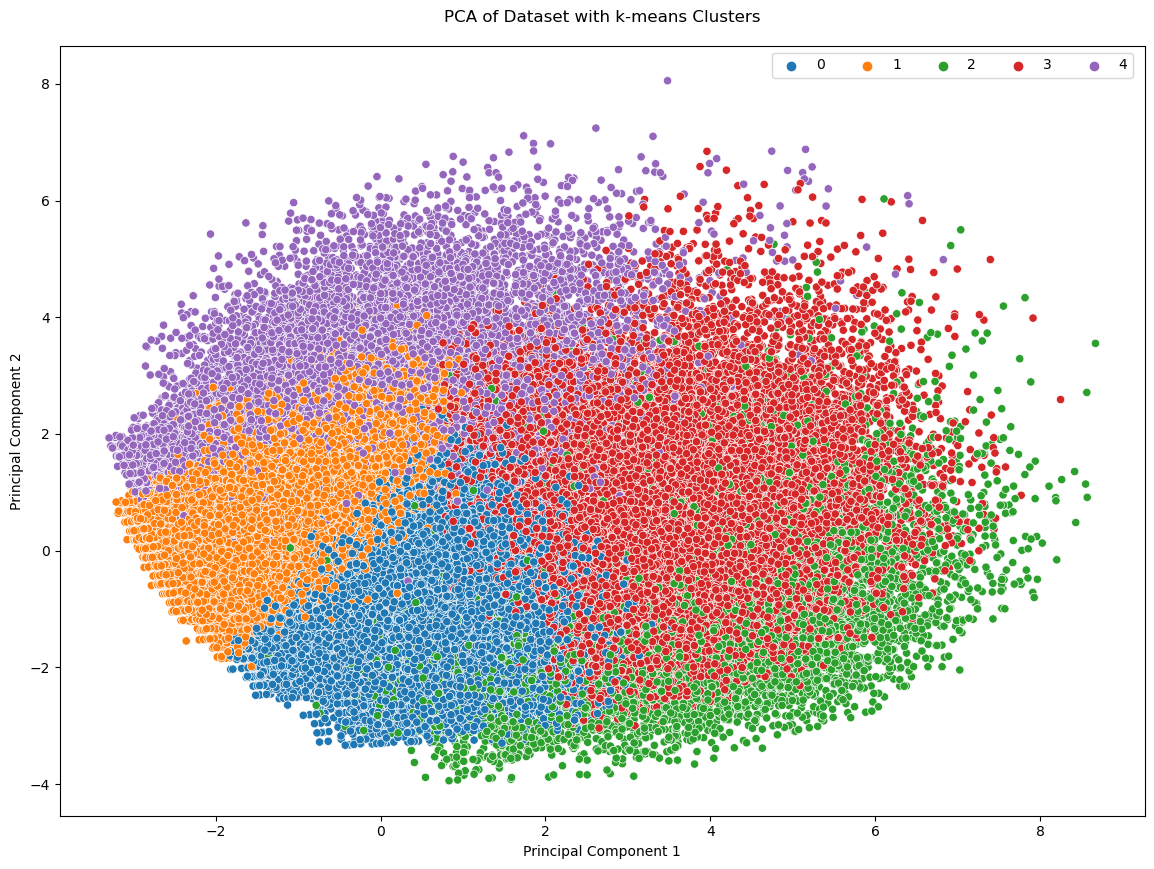

In [87]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_cluster', palette='tab10', data=data_pca)
plt.title('PCA of Dataset with k-means Clusters', y=1.02)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(0.65, 1),loc='upper left', ncols=5)
plt.show()

##### Let's analyze the kMeans Clusters one by one for each of the 6 clusters

### Without any clustering
Let's review the Pearson's Correlation / Heatmap in the original form

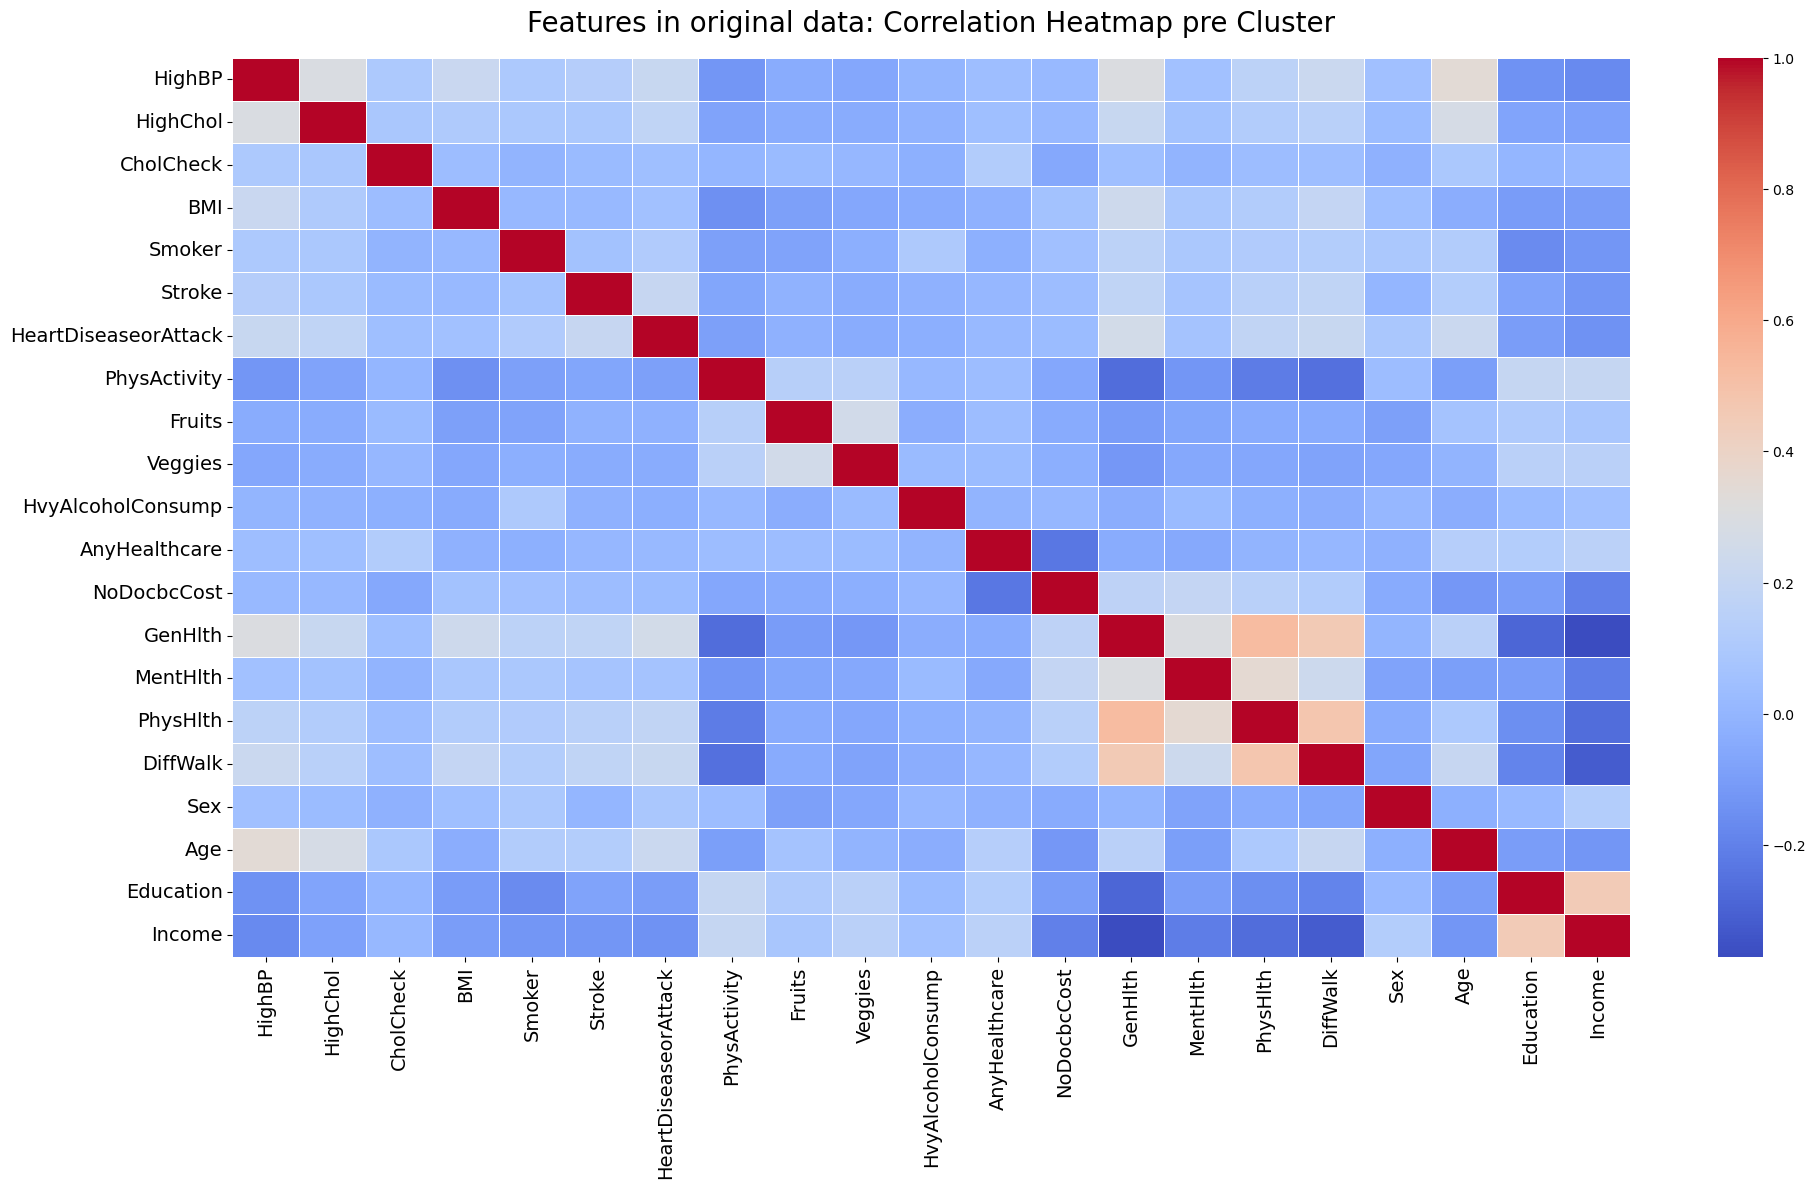

In [88]:
# Heatmap without kMeans Clustering
plt.figure(figsize=(20, 12))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Features in original data: Correlation Heatmap pre Cluster', fontsize = 20, y=1.02)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### With One (1) kMeans Cluster
Let's see how the Pearson's Correlation / Heatmap looks

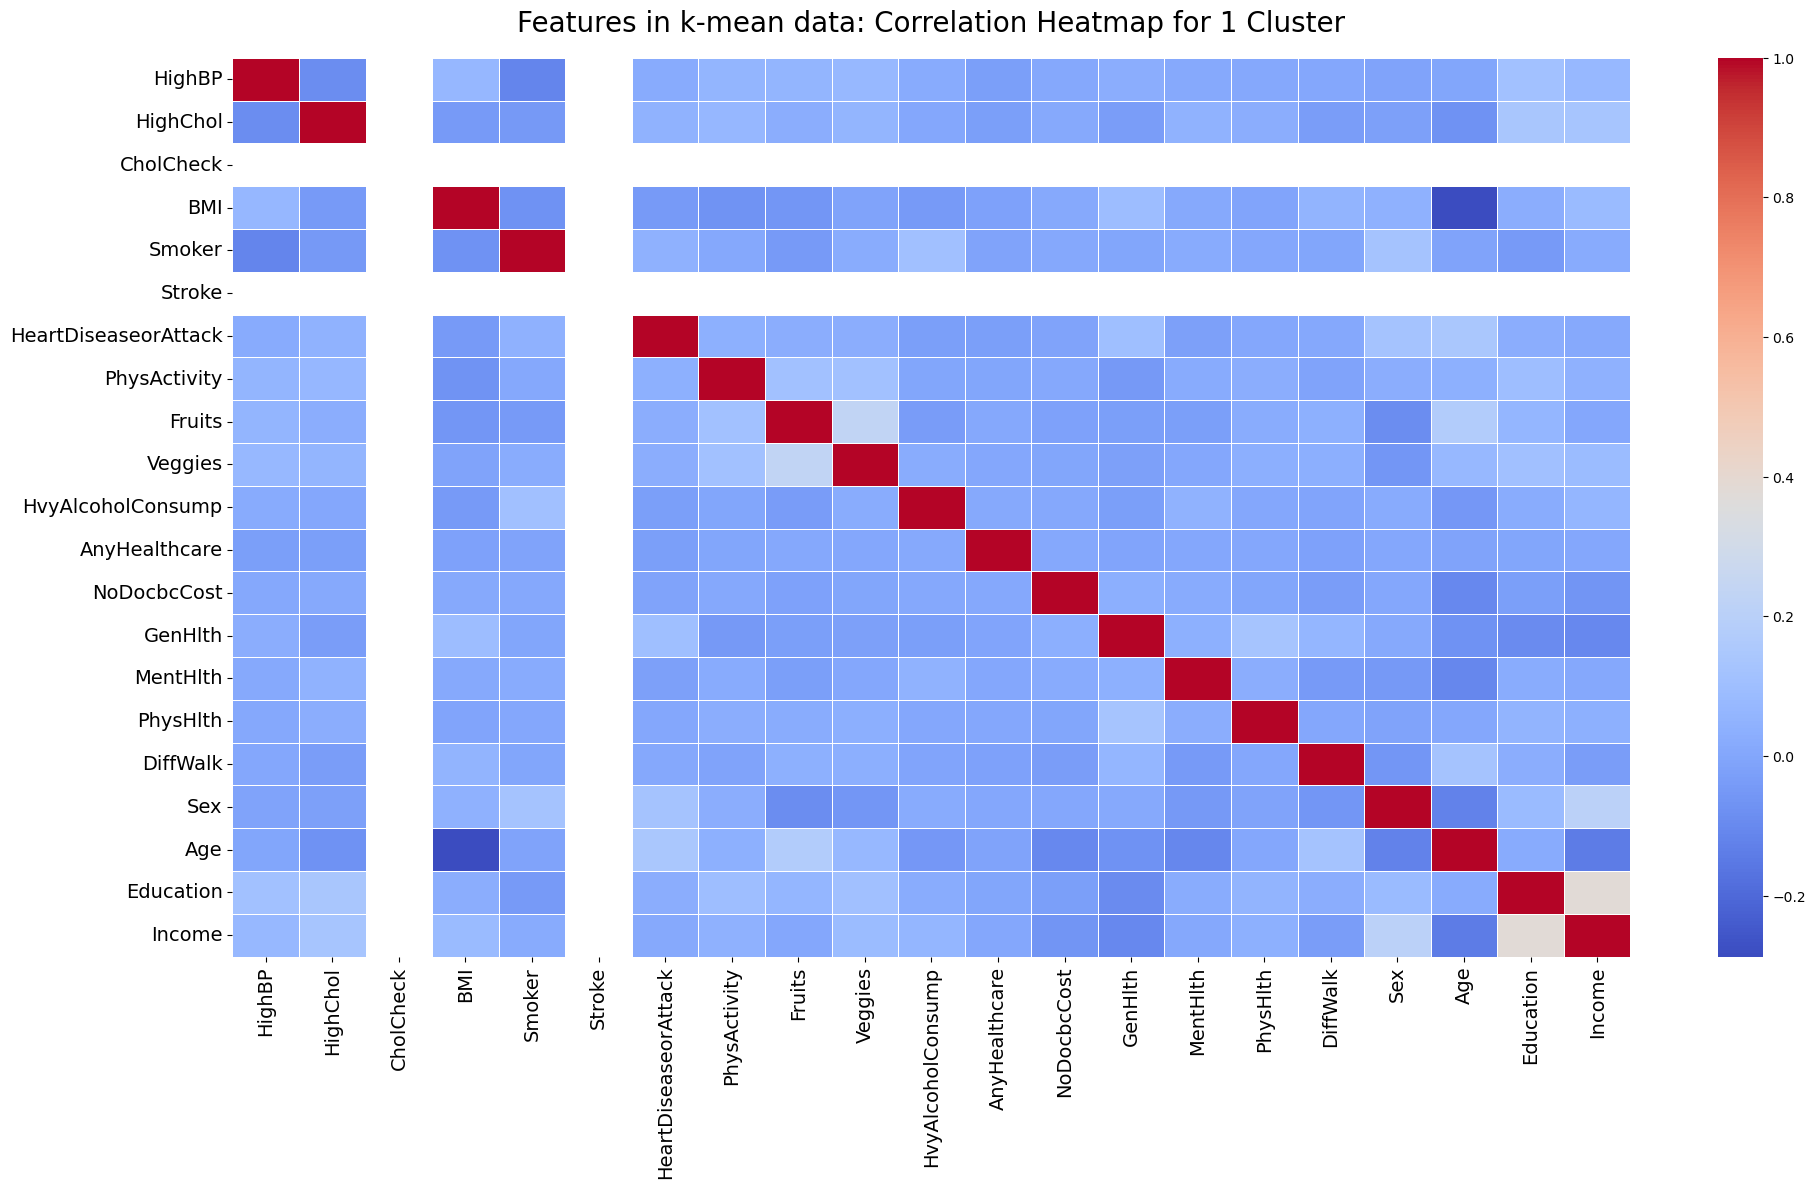

In [89]:
# Heatmap with kMeans Cluster = 0
plt.figure(figsize=(20, 12))
X_corr = X_kmeans.query('kmeans_cluster == 0')
X_corr.drop('kmeans_cluster',axis=1,inplace=True)
sns.heatmap(X_corr.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Features in k-mean data: Correlation Heatmap for 1 Cluster', fontsize = 20, y=1.02)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### With Two (2) kMeans Cluster
Let's see how the Pearson's Correlation / Heatmap looks

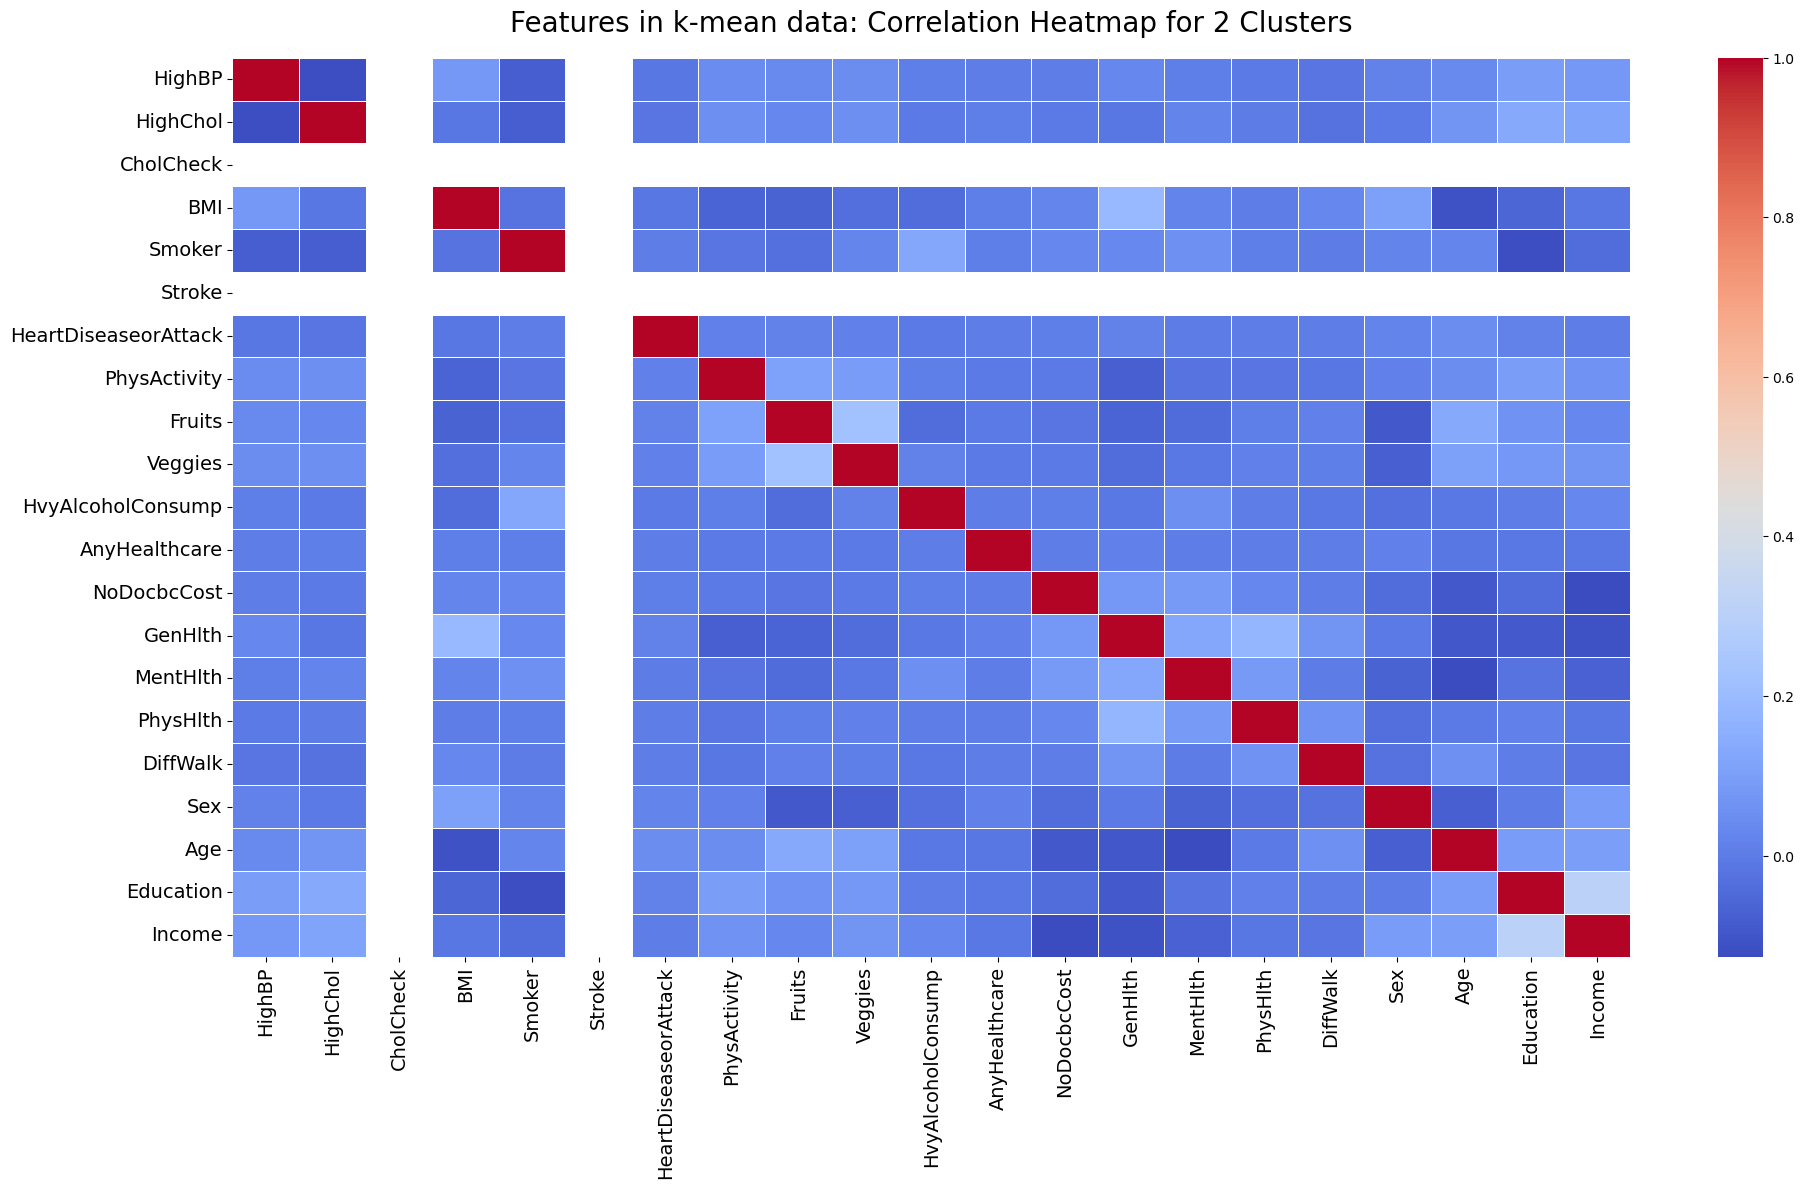

In [90]:
# Heatmap with kMeans Cluster = 1
plt.figure(figsize=(20, 12))
X_corr = X_kmeans.query('kmeans_cluster == 1')
X_corr.drop('kmeans_cluster',axis=1,inplace=True)
sns.heatmap(X_corr.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Features in k-mean data: Correlation Heatmap for 2 Clusters', fontsize = 20, y=1.02)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### With Three (3) kMeans Cluster
Let's see how the Pearson's Correlation / Heatmap looks

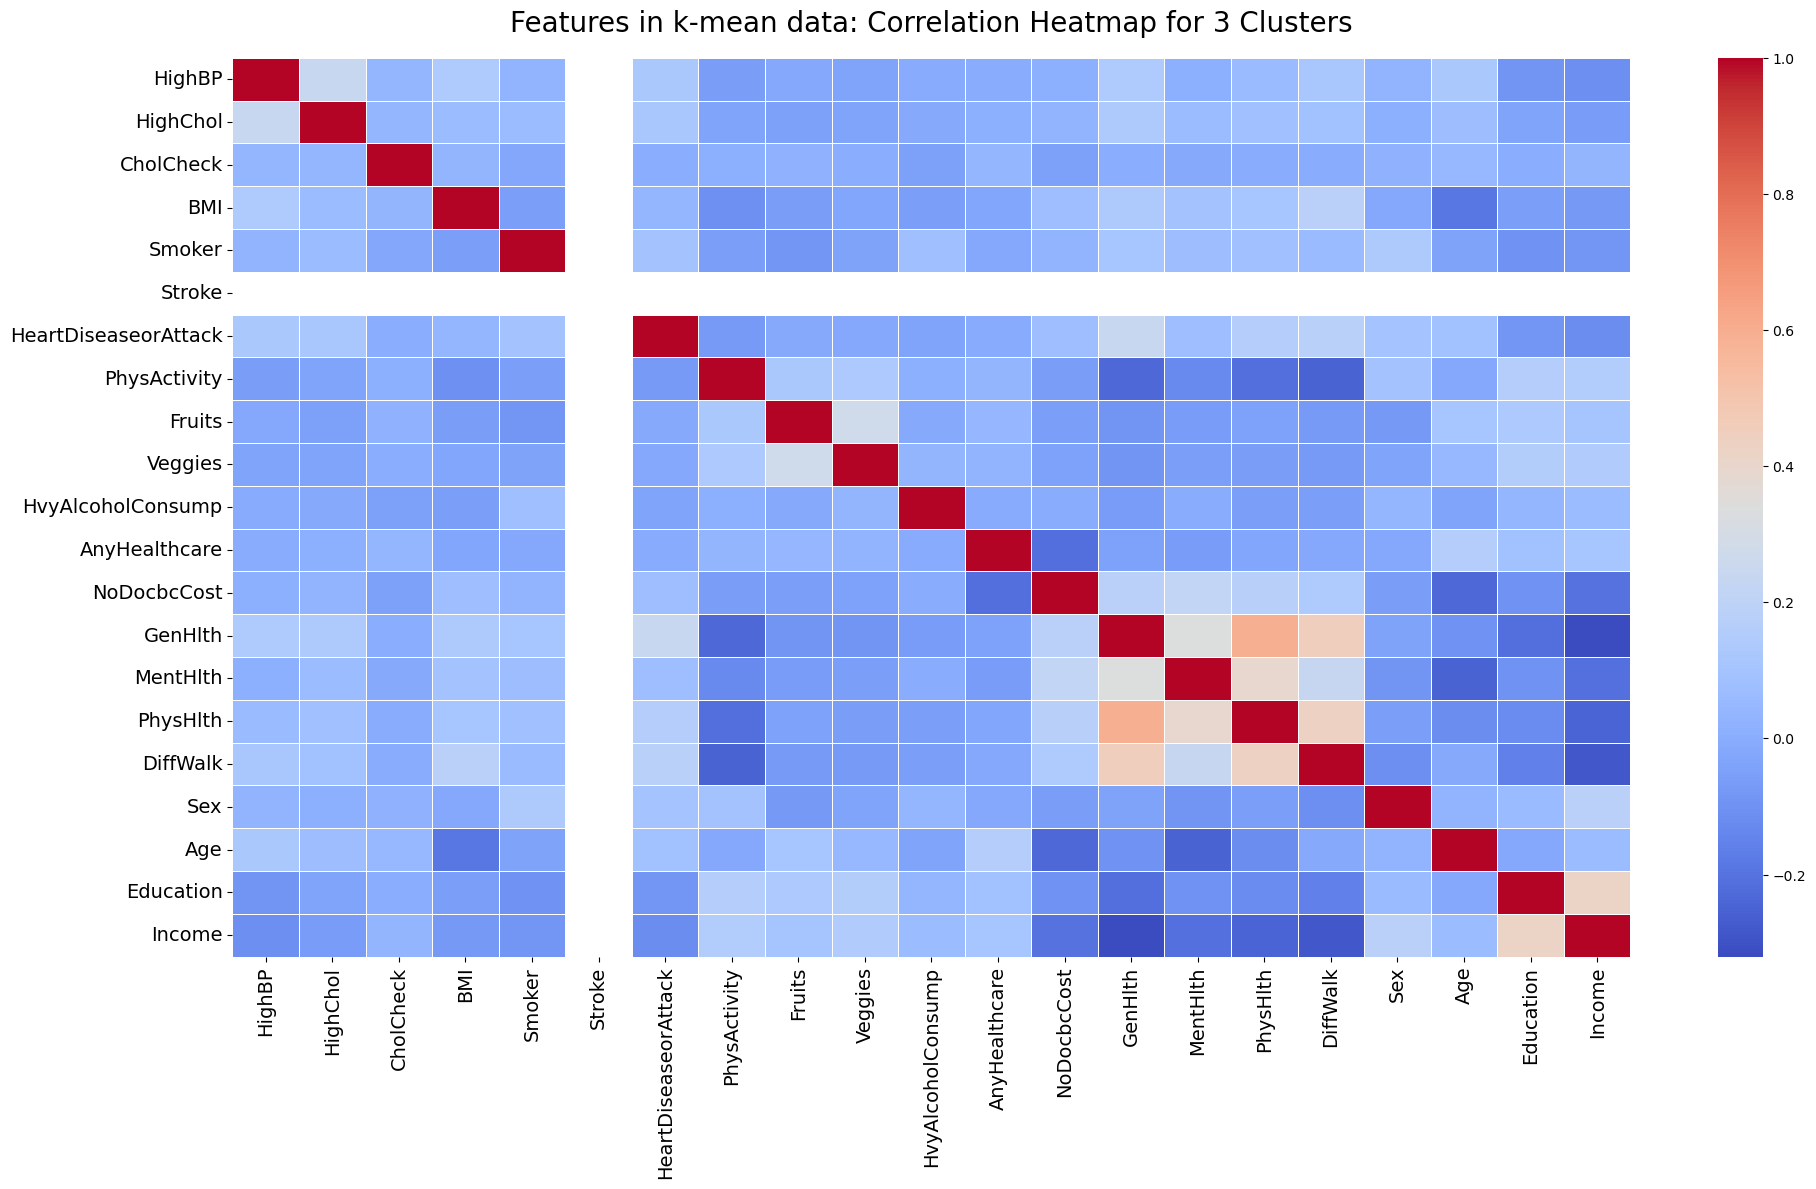

In [91]:
# Heatmap with kMeans Cluster = 2
plt.figure(figsize=(20, 12))
X_corr = X_kmeans.query('kmeans_cluster == 2')
X_corr.drop('kmeans_cluster',axis=1,inplace=True)
sns.heatmap(X_corr.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Features in k-mean data: Correlation Heatmap for 3 Clusters', fontsize = 20, y=1.02)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### With Four (4) kMeans Cluster
Let's see how the Pearson's Correlation / Heatmap looks

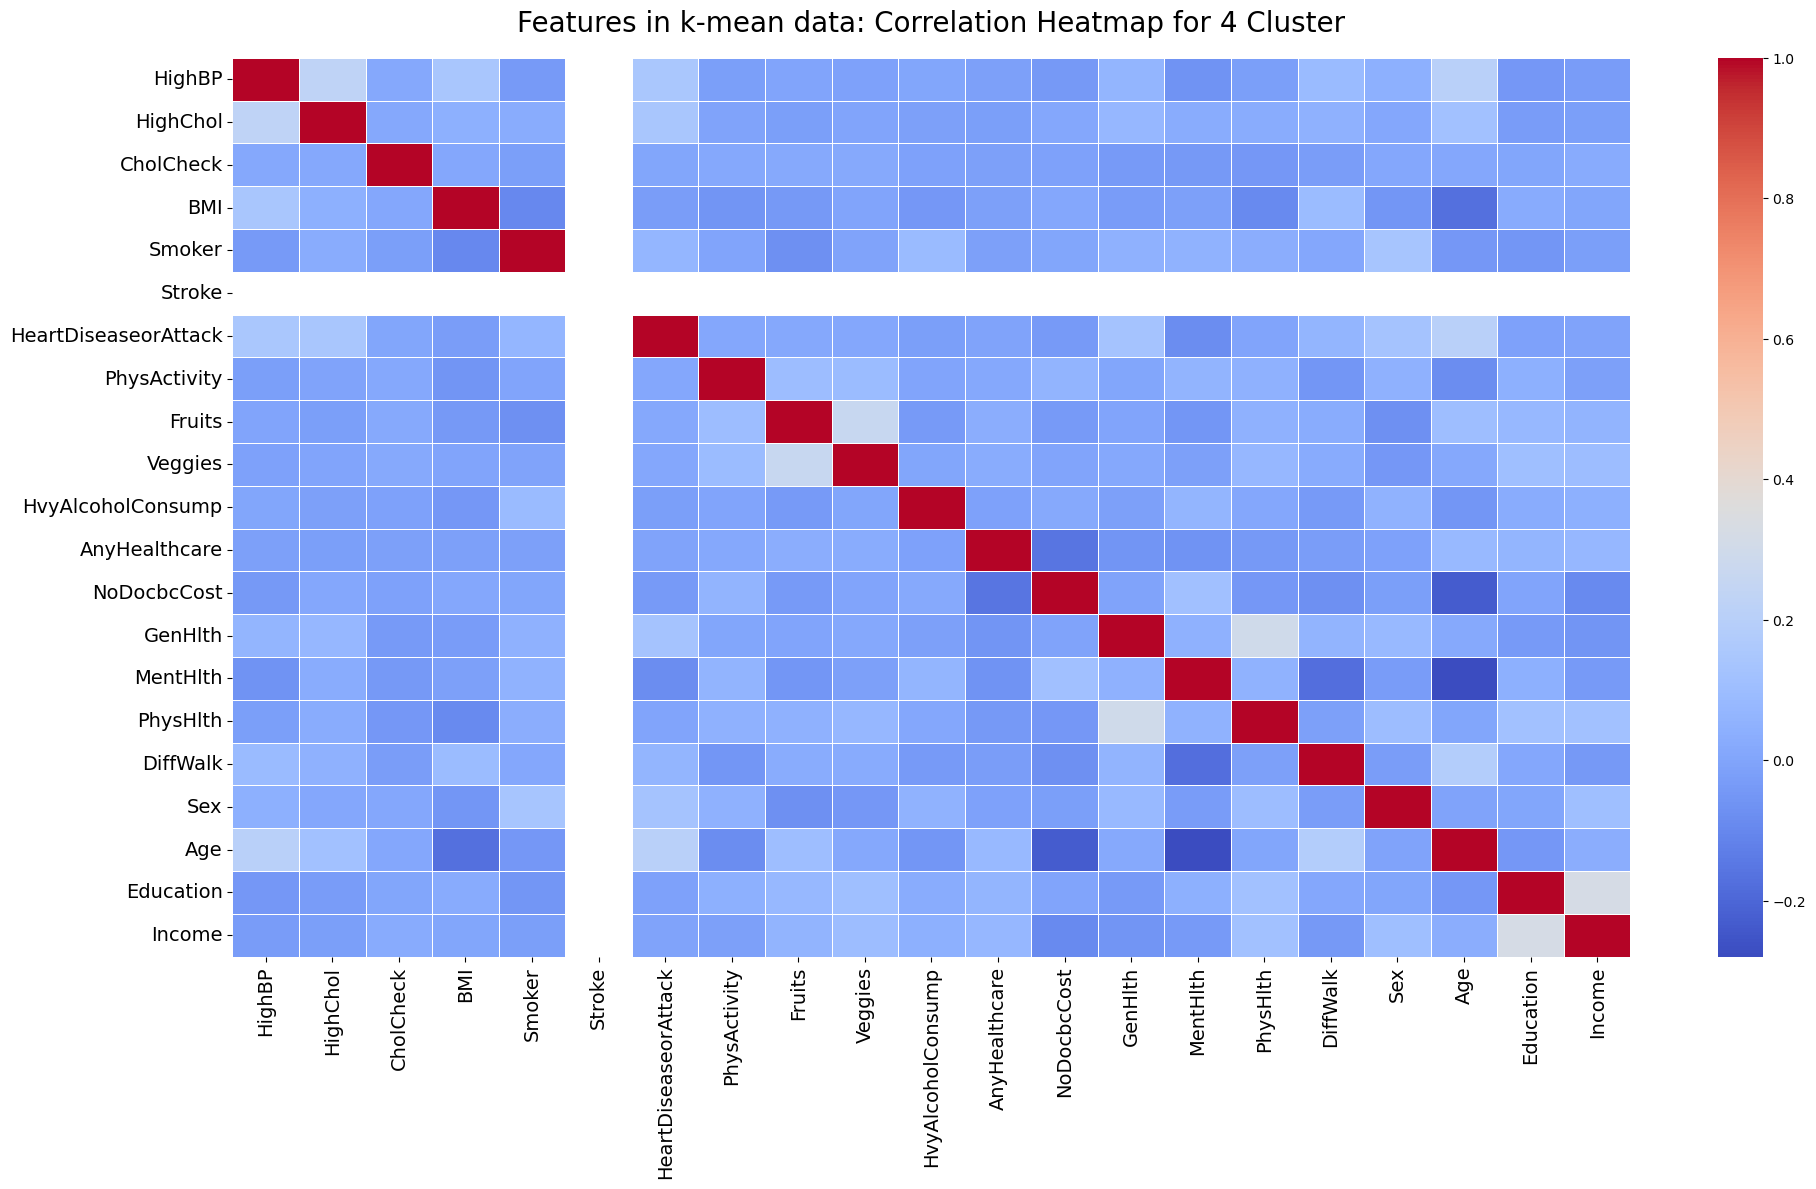

In [92]:
# Heatmap with kMeans Cluster = 3
plt.figure(figsize=(20, 12))
X_corr = X_kmeans.query('kmeans_cluster == 3')
X_corr.drop('kmeans_cluster',axis=1,inplace=True)
sns.heatmap(X_corr.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Features in k-mean data: Correlation Heatmap for 4 Cluster', fontsize = 20, y=1.02)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### With Five (5) kMeans Cluster
Let's see how the Pearson's Correlation / Heatmap looks

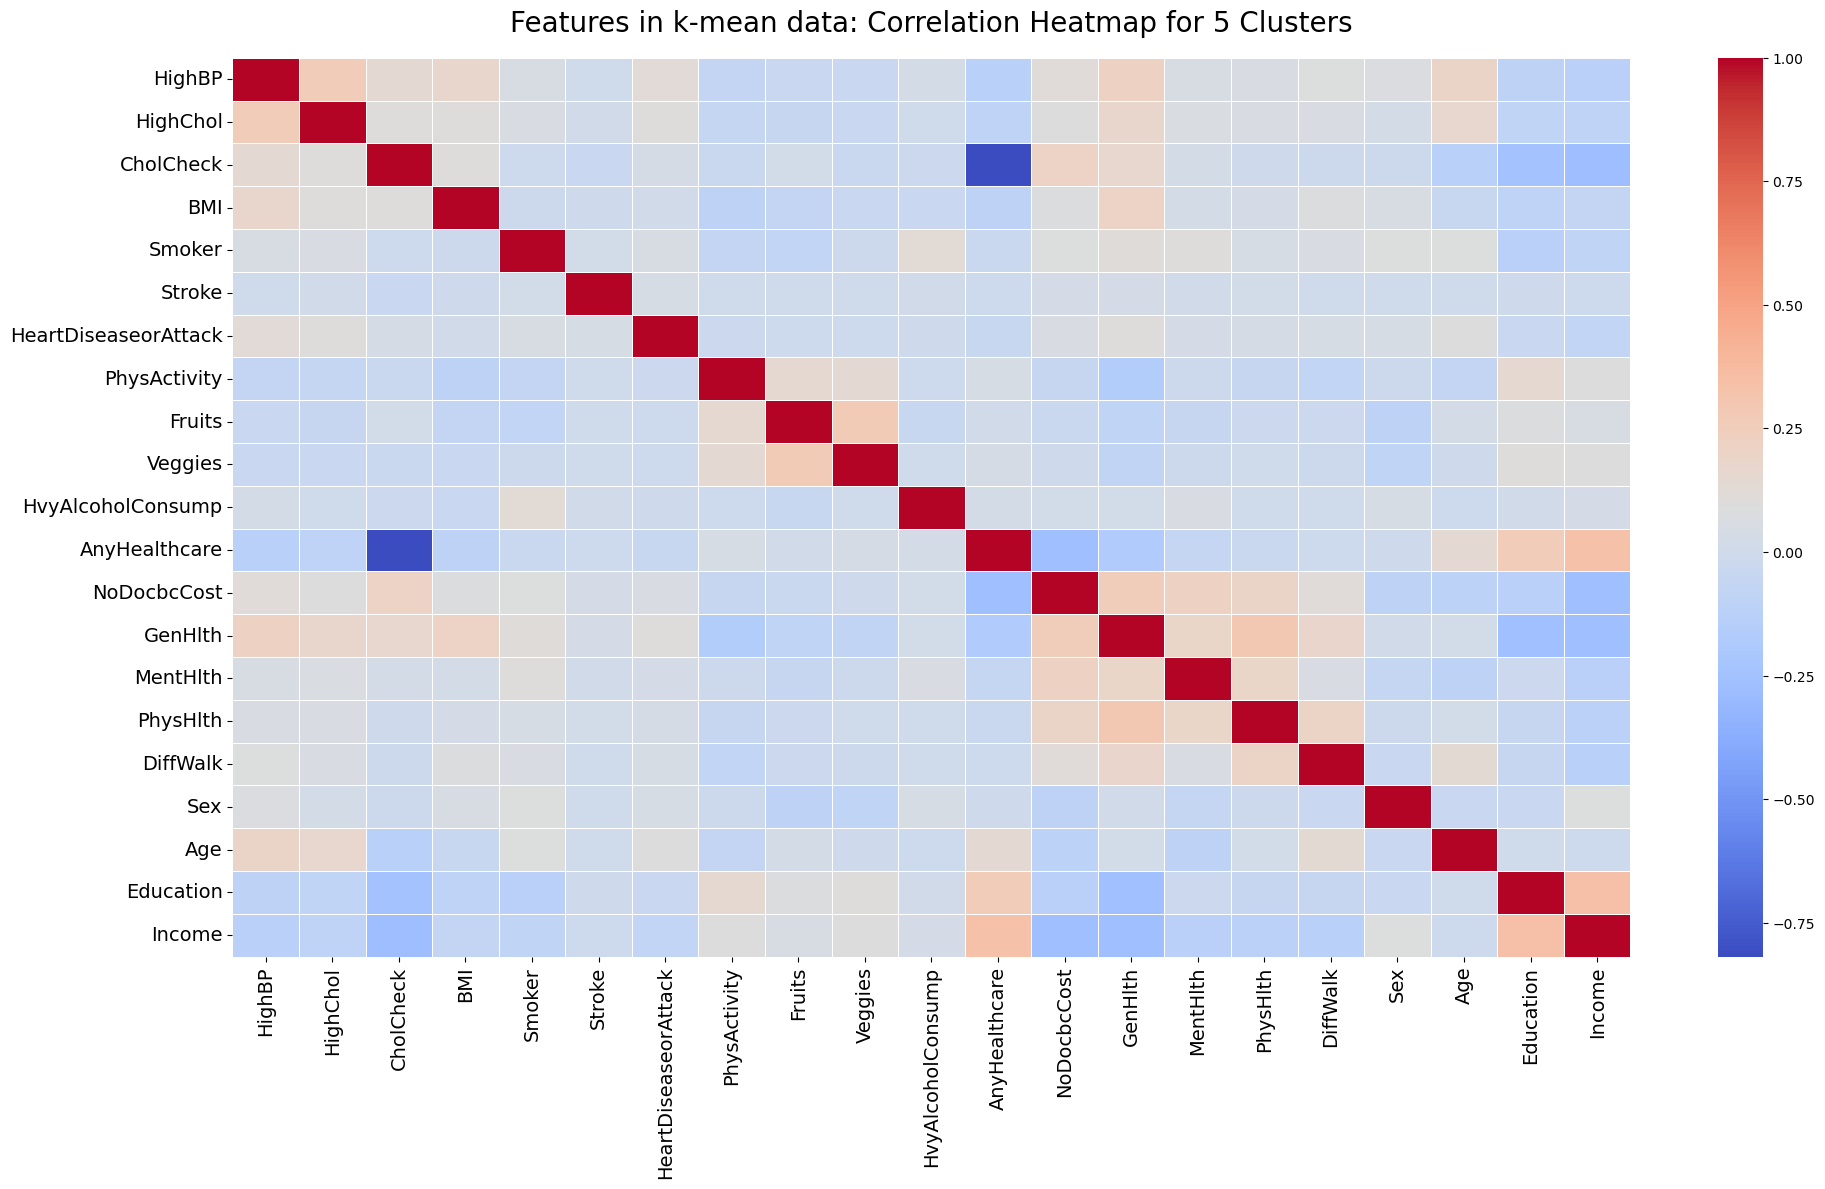

In [93]:
# Heatmap with kMeans Cluster = 4
plt.figure(figsize=(20, 12))
X_corr = X_kmeans.query('kmeans_cluster == 4')
X_corr.drop('kmeans_cluster',axis=1,inplace=True)
sns.heatmap(X_corr.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Features in k-mean data: Correlation Heatmap for 5 Clusters', fontsize = 20, y=1.02)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [94]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import graphviz

In [95]:
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report

In [96]:
# Let's split the data into training and test sets. We will use 80% of the data for training and 20% for test.
# stratify argument ensures that the same proportion of examples is preserved across each class of training and testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,stratify=y)

In [97]:
X_train.shape, X_test.shape

((202944, 21), (50736, 21))

In [98]:
y_train.shape, y_test.shape

((202944, 1), (50736, 1))

### Baseline Model - Dummy Classifier Model

In [99]:
# Create a Baseline Model using the DummyClassifier

# A baseline model for classification is a basic model that serves as a reference point for evaluating 
# other models' performance and guiding the development of more complex models

baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred = baseline_model.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
accuracy  = accuracy_score(y_test, y_pred)
fscore    = f1_score(y_test, y_pred)

print('Baseline Model using Dummy Classifier')
print(f'Precision is: {precision:.2f}')
print(f'Recall    is: {recall:.2f}')
print(f'F1 Score  is: {fscore:.2f}')
print(f'Accuracy  is: {accuracy:.2f}')

Baseline Model using Dummy Classifier
Precision is: 0.00
Recall    is: 0.00
F1 Score  is: 0.00
Accuracy  is: 0.86


In [100]:
# Let's evaluate the Confusion Matrix and print the results
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

y_pred_1d = y_pred.ravel()
y_test_1d = y_test.values.ravel()
pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

[[43667     0]
 [ 7069     0]]


Predicted      0    All
True                   
0          43667  43667
1           7069   7069
All        50736  50736

In [101]:
# Let us cross check the values against y_test, 
# we can see that the prediction from the Baseline Model (DummyClassifer) is the same as the groupby counts of y_test values

pd.DataFrame(y_test.groupby('Diabetes_binary').size(), columns = ['Total'])

Total
Diabetes_binary       
0                43667
1                 7069

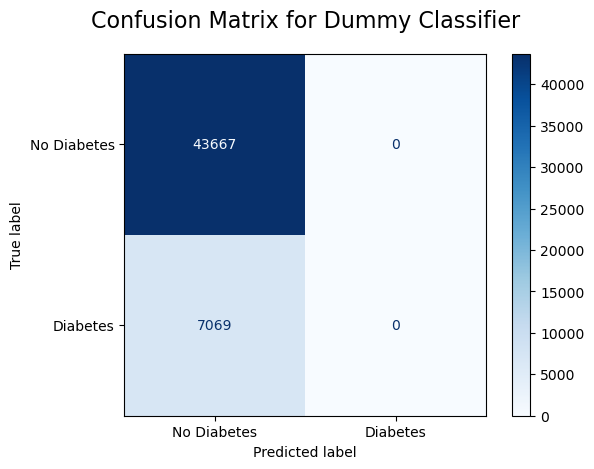

In [102]:
# Let's print the confusion matrix 

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, display_labels=['No Diabetes', 'Diabetes'] )
plt.title('Confusion Matrix for Dummy Classifier', fontsize = 16, y=1.05)
plt.tight_layout()
plt.show()

In [103]:
# ROC Curve
y_score_yes = baseline_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_yes, pos_label=1)

roc_auc_value = auc(fpr, tpr)
print (f'The Accuracy Score : AUC is {roc_auc_value:.2f}')

roc_auc_val = roc_auc_score(y_test, y_score_yes)

print (f'The ROC Accuracy Score : ROC-AUC is {roc_auc_val:.2f}')

The Accuracy Score : AUC is 0.50
The ROC Accuracy Score : ROC-AUC is 0.50


### Regression Model - Logistic Regression

In [104]:
# Create a basic Logistic Regression Model
lr_model = LogisticRegression()

# Train the basic Logistic Regression Model
lr_model.fit(X_train, y_train)

# Make the Prediction using the basic Logistic Regression Model on the X_test data
lr_pred = lr_model.predict(X_test)

In [105]:
# Evaluate the performance of the model
precision = precision_score(y_test, lr_pred)
recall    = recall_score(y_test, lr_pred)
accuracy  = accuracy_score(y_test, lr_pred)
fscore    = f1_score(y_test, lr_pred)

print('Logistic Regression basic model')
print(f'Precision is: {precision:.2f}')
print(f'Recall    is: {recall:.2f}')
print(f'F1 Score  is: {fscore:.2f}')
print(f'Accuracy  is: {accuracy:.2f}')

Logistic Regression basic model
Precision is: 0.50
Recall    is: 0.12
F1 Score  is: 0.20
Accuracy  is: 0.86


In [106]:
# Let's evaluate the Confusion Matrix and print the results
conf_matrix = confusion_matrix(y_test, lr_pred)

print(conf_matrix)

y_pred_1d = lr_pred.ravel()
y_test_1d = y_test.values.ravel()
pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

[[42807   860]
 [ 6193   876]]


Predicted      0     1    All
True                         
0          42807   860  43667
1           6193   876   7069
All        49000  1736  50736

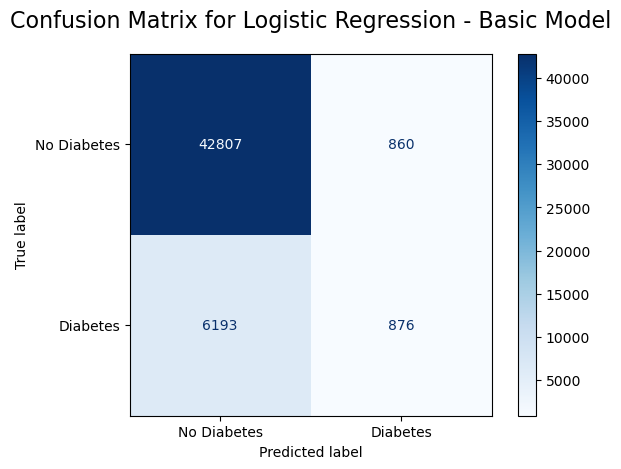

In [107]:
# Let's print the confusion matrix 

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, cmap=plt.cm.Blues, display_labels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Logistic Regression - Basic Model', fontsize = 16, y=1.05)
plt.tight_layout()
plt.show()

In [108]:
# Initialize all the models requested in this exercise
# Models are: Logistic Regression, Decision Tree Classifer, K Nearest Neighbor Classifer, and Support Vector Machines
model_dict = {
    'Dummy Classifier': DummyClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'K Nearest Neighbor Classifier': KNeighborsClassifier(),
    'Support Vector Machines': SVC(probability=True)
}

In [109]:
# Before we get started, let's create a function to do some routine tasks

# Function to Evaluate the performance of the model and Print the Results
def print_performance(pred_val, model_name):
    
    precision = precision_score(y_test, pred_val)
    recall    = recall_score(y_test, pred_val)
    accuracy  = accuracy_score(y_test, pred_val)
    fscore    = f1_score(y_test, pred_val)

    print(f'Performance Report for {model_name}\n')
    print(f'Precision is: {precision:.2f}')
    print(f'Recall    is: {recall:.2f}')
    print(f'F1 Score  is: {fscore:.2f}')
    print(f'Accuracy  is: {accuracy:.2f}')

    # Classification report
    print('\nClassification Report:')
    print(classification_report(y_test, pred_val))
    return precision, recall, accuracy, fscore

In [110]:
# Function to Evaluate the Confusion Matrix and Print the Results
def print_confusion_matrix(pred_val, model_name):
    
    conf_matrix = confusion_matrix(y_test, pred_val)

    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]

    print(f'Results for {model_name}\n')
    print('Confusion Matrix:\n')
    print(conf_matrix)
    print()

    print (f'True Negative  : {TN:4}')
    print (f'False Positive : {FP:4}')
    print (f'False Negative : {FN:4}')
    print (f'True Positive  : {TP:4}')
    print()
    
    y_pred_1d = pred_val.ravel()
    y_test_1d = y_test.values.ravel()
    ctab = pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

    print(ctab)

    # Let's print the confusion matrix 

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, pred_val, cmap=plt.cm.Blues, display_labels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix for {model_name}', y=1.02)
    plt.tight_layout()
    plt.show()
    return conf_matrix, TN, FP, FN, TP

In [111]:
# Function to calculate the ROC Accuracy Score and Print the Results

def print_roc_scores(y_prob,model_name):
    print(f'Model Name: {model_name}\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

    roc_auc_val = roc_auc_score(y_test, y_prob)

    print (f'The ROC Accuracy Score : ROC-AUC is {roc_auc_val:.2f}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], 'k--',color='red')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'{model_name} : Receiver Operating Characteristic (ROC) Curve',y=1.03)
    plt.legend(loc='lower right')
    plt.show()
    return roc_auc_val, fpr, tpr

In [112]:
# Function to create the Evaluate the Model (Train the model /Fit the model, then perform prediction using Predict)
# We will also calculate the time to train the model and print all the key values using the print functions we defined

# Use a flag for Optimized to check if we are doing basic model review or optimization model reviews

def evaluate_model(model, model_name, optimized):

    # Train the Model and also capture the training time
    tic=timeit.default_timer()
    if model_name in ['K Nearest Neighbor Classifier', 'Support Vector Machines']:
        model.fit(X_train.values, y_train)
    else:
        model.fit(X_train, y_train)
    toc=timeit.default_timer()
    tsec = toc - tic #elapsed time in seconds
    
    print (f'Results for {model_name}\n')
    print (f'Training Time     : {tsec:.4f} seconds\n')

    # Calculate the Training and Test Accuracy
    if model_name in ['K Nearest Neighbor Classifier', 'Support Vector Machines']:
        train_accuracy = model.score(X_train.values, y_train)
        test_accuracy  = model.score(X_test.values, y_test)
    else:
        train_accuracy = model.score(X_train, y_train)
        test_accuracy  = model.score(X_test, y_test)
    
    print (f'Training Accuracy : {train_accuracy:.2f}\n')
    print (f'Test     Accuracy : {test_accuracy:.2f}\n')

    #For Optimization request, use best_estimator to pick the predict values and predict probability
    if optimized:
        best_model = model.best_estimator_
        pred_val = best_model.predict(X_test)
        y_prob  = best_model.predict_proba(X_test)[:, 1]
    
    # Predict the results for the model
    if model_name in ['K Nearest Neighbor Classifier', 'Support Vector Machines']:
        pred_val = model.predict(X_test.values)
    else:
        pred_val = model.predict(X_test)

    # Calculate the Prediction Probability for each test set
    if model_name in ['K Nearest Neighbor Classifier', 'Support Vector Machines']:
        y_prob  = model.predict_proba(X_test.values)[:, 1]
    else:
        y_prob  = model.predict_proba(X_test)[:, 1]

    # Calculate and Print the Performance of the Model
    precision, recall, accuracy, fscore = print_performance(pred_val, model_name)

    # Compute and Print the Confusion Matrix
    conf_matrix, tn, fp, fn, tp = print_confusion_matrix(pred_val, model_name)

    # Compute and Print the ROC Curve
    auc_roc_val, fpr, tpr = print_roc_scores(y_prob, model_name)

    return [f'{tsec:.4f}', f'{train_accuracy:.2f}', f'{test_accuracy:.2f}', 
            f'{precision:.2f}', f'{recall:.2f}', f'{accuracy:.2f}', f'{fscore:.2f}', f'{auc_roc_val:.2f}', 
            tn, fp, fn, tp, fpr, tpr, conf_matrix]

## Evaluate for Male Patients

In [113]:
# Let's split the data into training and test sets. We will use 80% of the data for training and 20% for test.
# stratify argument ensures that the same proportion of examples is preserved across each class of training and testing data.

X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size = 0.2, random_state=42,stratify=ym)

Results for Dummy Classifier

Training Time     : 0.0018 seconds

Training Accuracy : 0.85

Test     Accuracy : 0.85

Performance Report for Dummy Classifier

Precision is: 0.00
Recall    is: 0.00
F1 Score  is: 0.00
Accuracy  is: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     18955
           1       0.00      0.00      0.00      3387

    accuracy                           0.85     22342
   macro avg       0.42      0.50      0.46     22342
weighted avg       0.72      0.85      0.78     22342

Results for Dummy Classifier

Confusion Matrix:

[[18955     0]
 [ 3387     0]]

True Negative  : 18955
False Positive :    0
False Negative : 3387
True Positive  :    0

Predicted      0    All
True                   
0          18955  18955
1           3387   3387
All        22342  22342


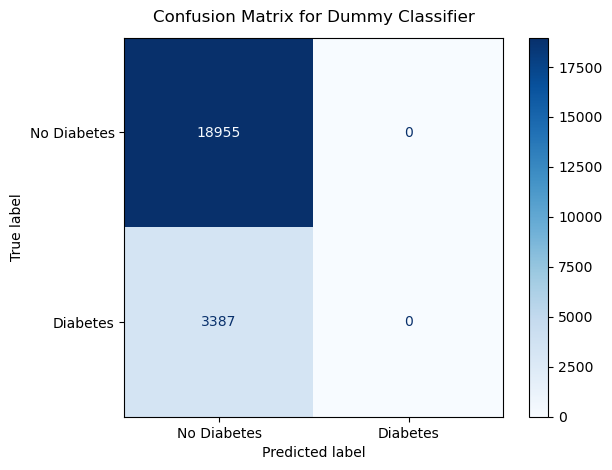

Model Name: Dummy Classifier

The ROC Accuracy Score : ROC-AUC is 0.50





Results for Logistic Regression

Training Time     : 0.3725 seconds

Training Accuracy : 0.85

Test     Accuracy : 0.85

Performance Report for Logistic Regression

Precision is: 0.51
Recall    is: 0.14
F1 Score  is: 0.22
Accuracy  is: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     18955
           1       0.51      0.14      0.22      3387

    accuracy                           0.85     22342
   macro avg       0.69      0.56      0.57     22342
weighted avg       0.81      0.85      0.81     22342

Results for Logistic Regression

Confusion Matrix:

[[18489   466]
 [ 2909   478]]

True Negative  : 18489
False Positive :  466
False Negative : 2909
True Positive  :  478

Predicted      0    1    All
True                        
0          18489  466  18955
1           2909  478   3387
All        21398  944  22342


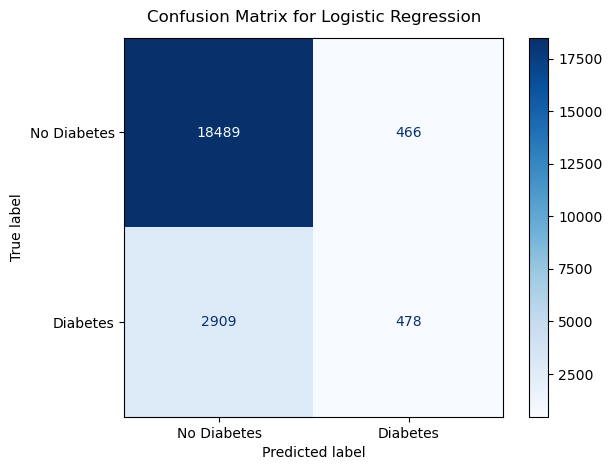

Model Name: Logistic Regression

The ROC Accuracy Score : ROC-AUC is 0.80



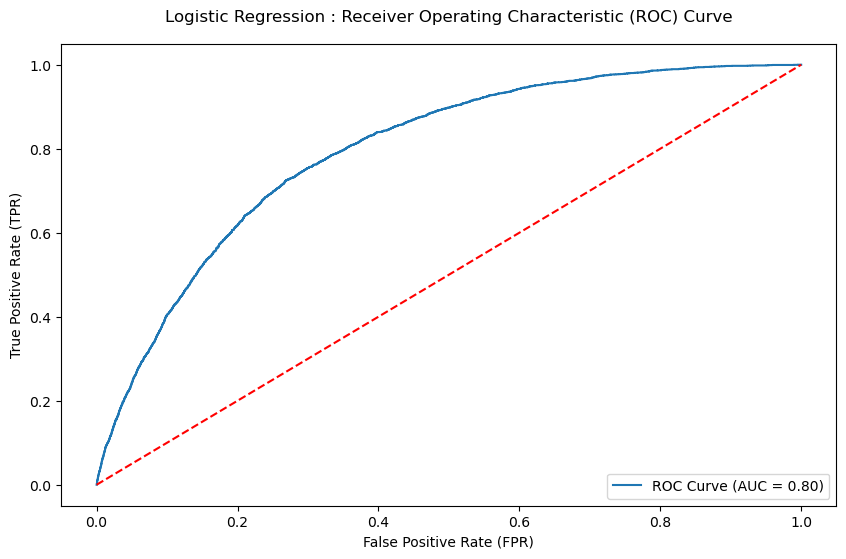



Results for Decision Tree Classifier

Training Time     : 0.2130 seconds

Training Accuracy : 0.99

Test     Accuracy : 0.78

Performance Report for Decision Tree Classifier

Precision is: 0.30
Recall    is: 0.33
F1 Score  is: 0.32
Accuracy  is: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     18955
           1       0.30      0.33      0.32      3387

    accuracy                           0.78     22342
   macro avg       0.59      0.60      0.59     22342
weighted avg       0.79      0.78      0.79     22342

Results for Decision Tree Classifier

Confusion Matrix:

[[16371  2584]
 [ 2262  1125]]

True Negative  : 16371
False Positive : 2584
False Negative : 2262
True Positive  : 1125

Predicted      0     1    All
True                         
0          16371  2584  18955
1           2262  1125   3387
All        18633  3709  22342


Model Name: Decision Tree Classifier

The ROC Accuracy Score : ROC-AUC is 0.60



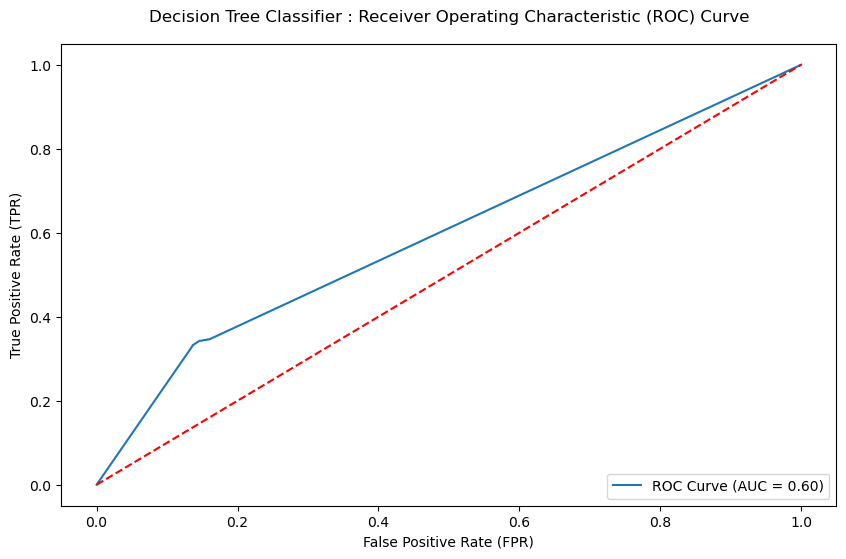



Results for K Nearest Neighbor Classifier

Training Time     : 0.0041 seconds

Training Accuracy : 0.88

Test     Accuracy : 0.83

Performance Report for K Nearest Neighbor Classifier

Precision is: 0.40
Recall    is: 0.21
F1 Score  is: 0.27
Accuracy  is: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     18955
           1       0.40      0.21      0.27      3387

    accuracy                           0.83     22342
   macro avg       0.64      0.58      0.59     22342
weighted avg       0.80      0.83      0.81     22342

Results for K Nearest Neighbor Classifier

Confusion Matrix:

[[17910  1045]
 [ 2687   700]]

True Negative  : 17910
False Positive : 1045
False Negative : 2687
True Positive  :  700

Predicted      0     1    All
True                         
0          17910  1045  18955
1           2687   700   3387
All        20597  1745  22342


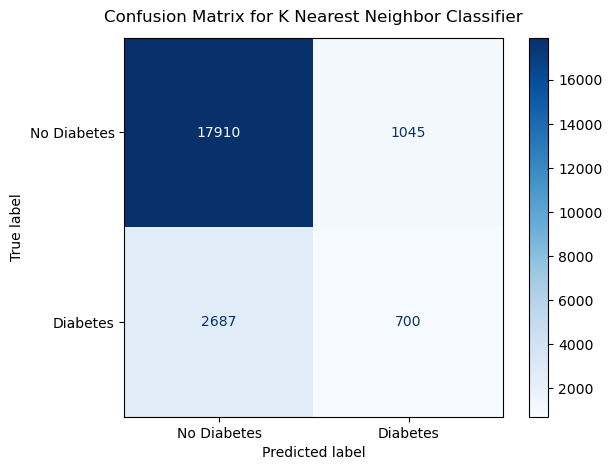

Model Name: K Nearest Neighbor Classifier

The ROC Accuracy Score : ROC-AUC is 0.70



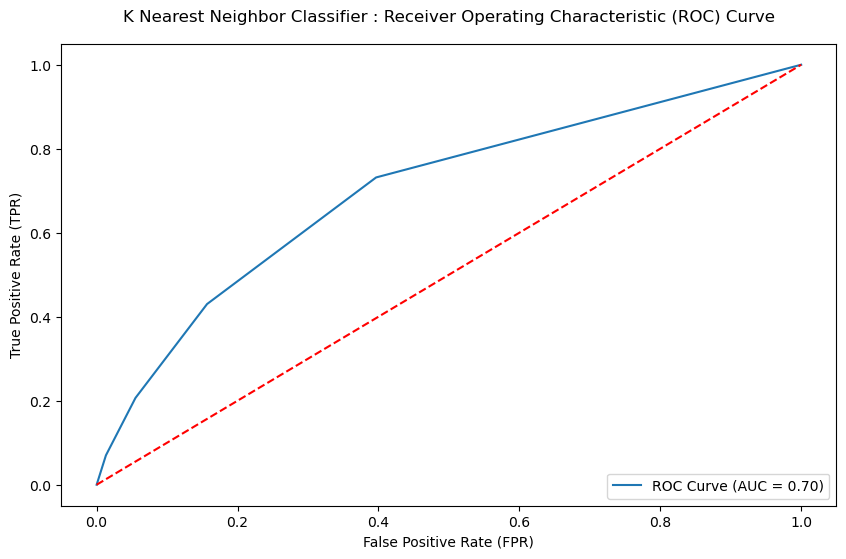



Results for Support Vector Machines

Training Time     : 735.8324 seconds

Training Accuracy : 0.85

Test     Accuracy : 0.85

Performance Report for Support Vector Machines

Precision is: 0.59
Recall    is: 0.01
F1 Score  is: 0.03
Accuracy  is: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     18955
           1       0.59      0.01      0.03      3387

    accuracy                           0.85     22342
   macro avg       0.72      0.51      0.47     22342
weighted avg       0.81      0.85      0.78     22342

Results for Support Vector Machines

Confusion Matrix:

[[18925    30]
 [ 3343    44]]

True Negative  : 18925
False Positive :   30
False Negative : 3343
True Positive  :   44

Predicted      0   1    All
True                       
0          18925  30  18955
1           3343  44   3387
All        22268  74  22342


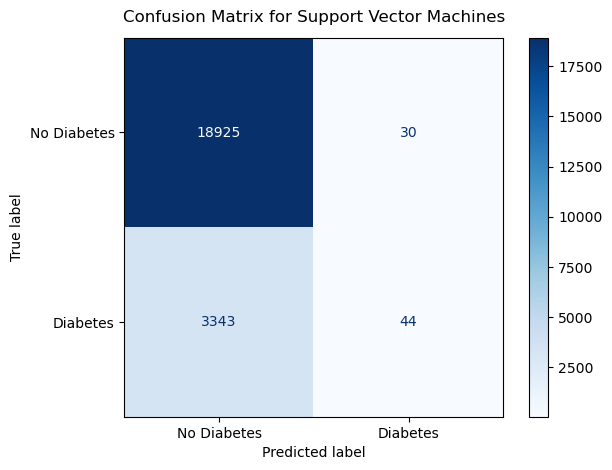

Model Name: Support Vector Machines

The ROC Accuracy Score : ROC-AUC is 0.72



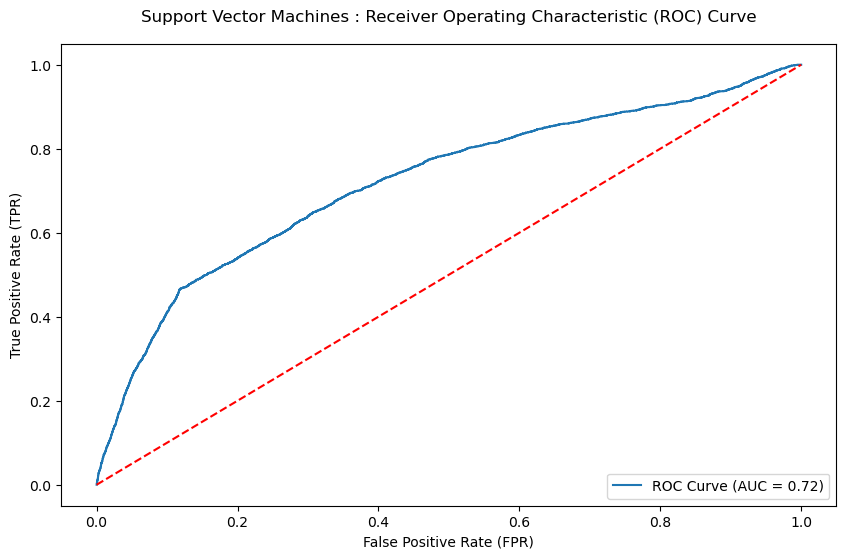

In [114]:
# Evaluate all the Model

final_results = {}

for model_name, model in model_dict.items():
    final_results[model_name] = evaluate_model(model, model_name, False)
    print('\n','='*120,'\n')

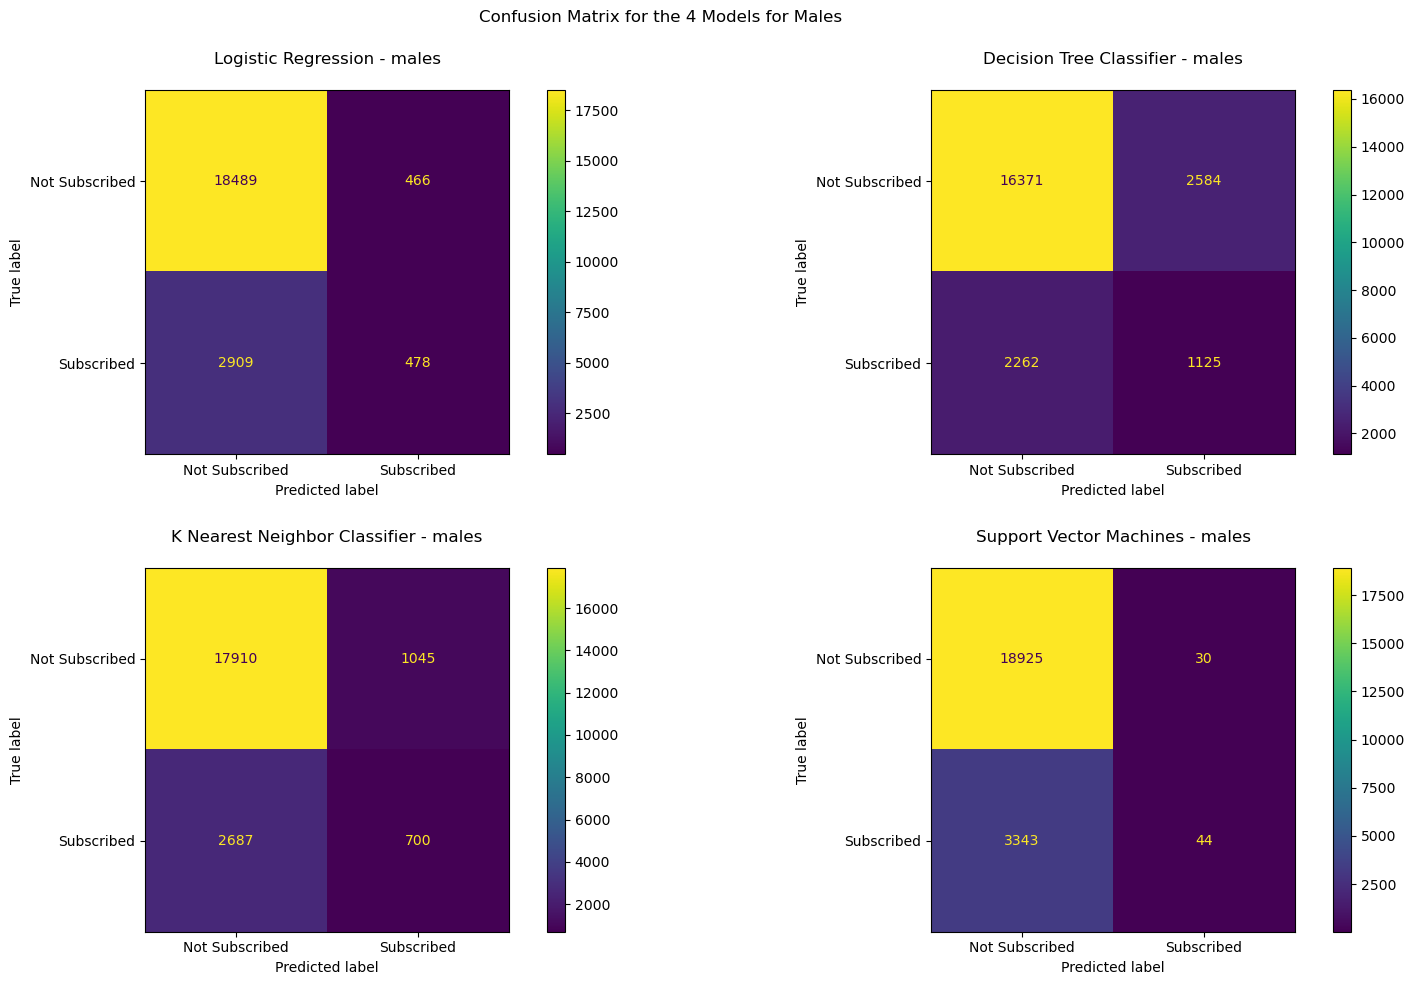

In [115]:
# Creating a 2x2 Grid of the Confusion Matrix for the 4 models

fig, axes = plt.subplots(2, 2, figsize=(16, 10))    # Create a 2x2 grid of subplots
fig.suptitle('Confusion Matrix for the 4 Models for Males')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for model_name, results in final_results.items():
    if model_name == 'Dummy Classifier': 
        #remove confusion matrix from final results
        final_results[model_name] = results[:-1]
        continue
    r,c = int(plot_count/2),int(plot_count%2)

    # Get the Confusion Matrix from the result set. The last value in the list is the Confusion Matrix for each Model
    
    conf_matrix = results[-1]

    #remove confusion matrix from final results
    final_results[model_name] = results[:-1]
    
    # Visualizing Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])

    # plot the Confusion Matrix Graph to the appropriate axes
    
    disp.plot(ax=axes[r,c])

    # set the title of each axes to the corresponding model name
    axes[r,c].set_title(f'\n{model_name} - males\n')

    plot_count += 1

plt.tight_layout()
plt.savefig('Confusion Matrix Comparison for 4 Models-Males.png')
plt.show()

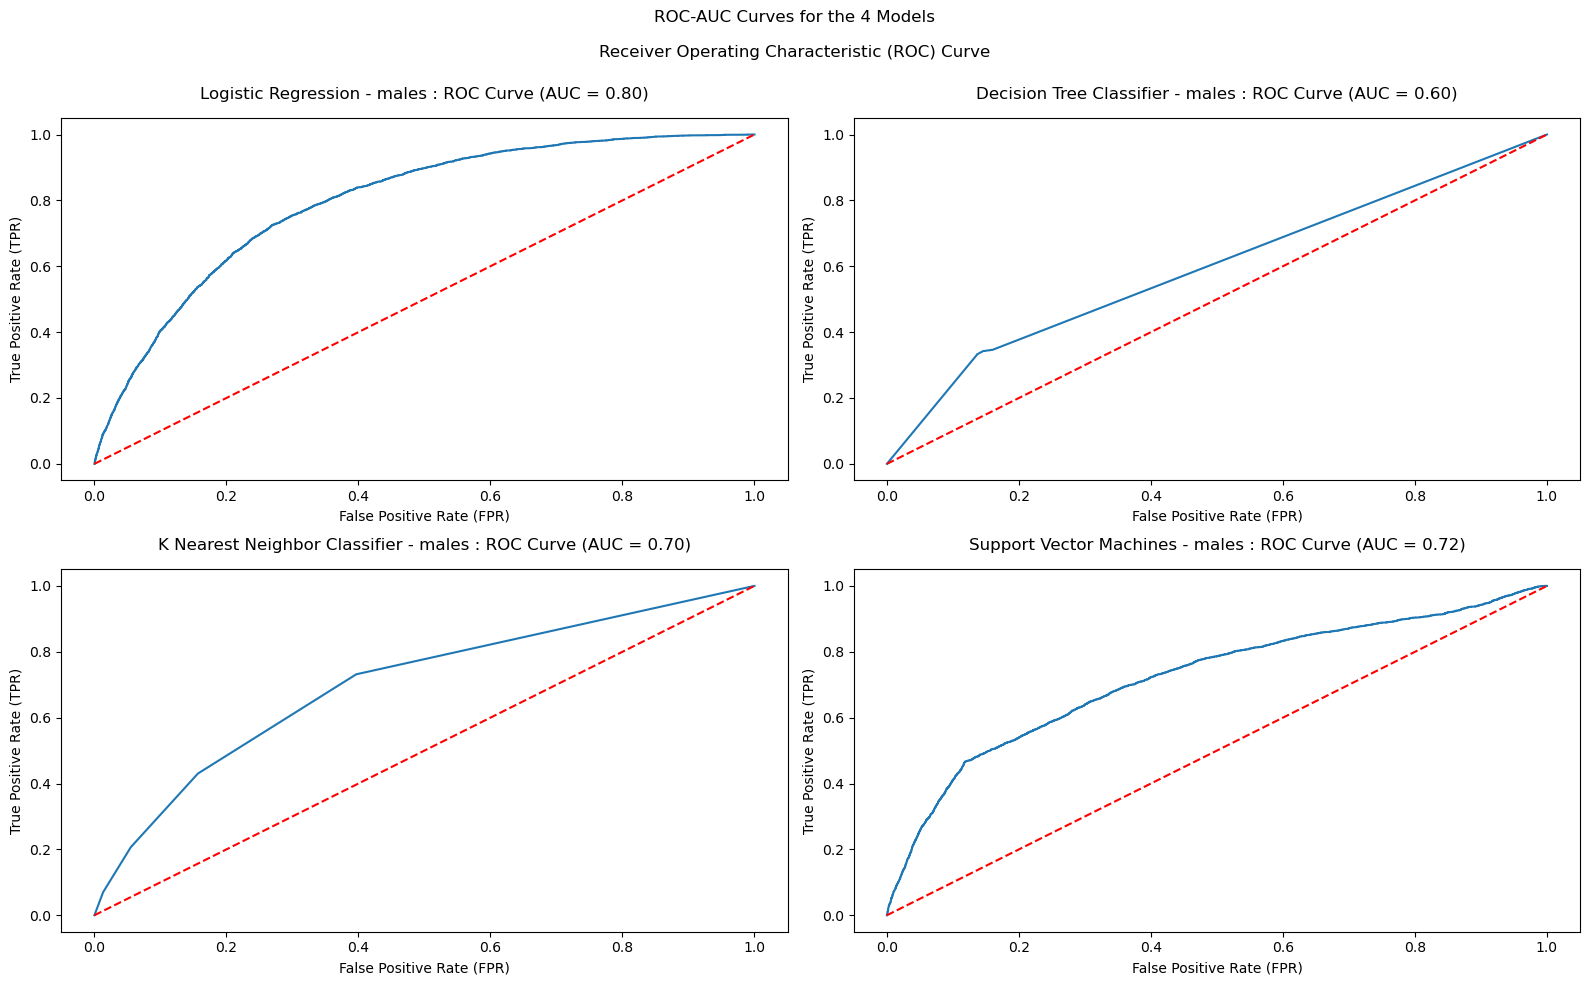

In [116]:
# Creating a 2x2 Grid of the ROC-AUC Curves for the 4 models
fig, axes = plt.subplots(2, 2, figsize=(16, 10))    # Create a 2x2 grid of subplots
fig.suptitle('ROC-AUC Curves for the 4 Models\n\nReceiver Operating Characteristic (ROC) Curve\n')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for model_name, results in final_results.items():
    if model_name == 'Dummy Classifier': 
        #remove fpr and tpr from final results
        final_results[model_name] = results[:-2]
        continue
    r,c = int(plot_count/2),int(plot_count%2)

    # Get the Confusion Matrix from the result set. The last value in the list is the Confusion Matrix for each Model
    
    fpr, tpr = results[-2], results[-1]

    #remove fpr and tpr from final results
    final_results[model_name] = results[:-2]
    roc_auc_val = results[7]
    
    # plot the ROC AUC Curve to the appropriate axes
    label_val = 'ROC Curve (AUC = ' + roc_auc_val + ')'
    
    axes[r,c].plot(fpr, tpr, label=label_val)
    axes[r,c].plot([0, 1], [0, 1], 'k--',color='red')
    axes[r,c].set_xlabel('False Positive Rate (FPR)')
    axes[r,c].set_ylabel('True Positive Rate (TPR)')
    axes[r,c].set_title(f'{model_name} - males : {label_val}',y=1.03)
    
    # set the title of each axes to the corresponding model name
    #axes[r,c].set_title(f'{model_name}')

    plot_count += 1

plt.tight_layout()
plt.savefig('ROC-AUC Curve Comparison for 4 Models-males.png')
plt.show()

In [117]:
final_df = pd.DataFrame(final_results).T
final_df.columns = ['Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision Score', 
                    'Recall Score', 'Accuracy Score', 'F1 Score', 'ROC AUC', 
                   'True Negative', 'False Positive', 'False Negative', 'True Positive'] 
final_df

Train Time Train Accuracy Test Accuracy  \
Dummy Classifier                  0.0018           0.85          0.85   
Logistic Regression               0.3725           0.85          0.85   
Decision Tree Classifier          0.2130           0.99          0.78   
K Nearest Neighbor Classifier     0.0041           0.88          0.83   
Support Vector Machines         735.8324           0.85          0.85   

                              Precision Score Recall Score Accuracy Score  \
Dummy Classifier                         0.00         0.00           0.85   
Logistic Regression                      0.51         0.14           0.85   
Decision Tree Classifier                 0.30         0.33           0.78   
K Nearest Neighbor Classifier            0.40         0.21           0.83   
Support Vector Machines                  0.59         0.01           0.85   

                              F1 Score ROC AUC True Negative False Positive  \
Dummy Classifier                  0.00    0.50         18955              0   
Logistic Regression               0.22    0.80         18489            466   
Decision Tree Classifier          0.32    0.60         16371           2584   
K Nearest Neighbor Classifier     0.27    0.70         17910           1045   
Support Vector Machines           0.03    0.72         18925             30   

                              False Negative True Positive  
Dummy Classifier                        3387             0  
Logistic Regression                     2909           478  
Decision Tree Classifier                2262          1125  
K Nearest Neighbor Classifier           2687           700  
Support Vector Machines                 3343            44

## Evaluate for Female Patients

In [118]:
# Let's split the data into training and test sets. We will use 80% of the data for training and 20% for test.
# stratify argument ensures that the same proportion of examples is preserved across each class of training and testing data.

X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size = 0.2, random_state=42,stratify=yf)

Results for Dummy Classifier

Training Time     : 0.0032 seconds

Training Accuracy : 0.87

Test     Accuracy : 0.87

Performance Report for Dummy Classifier

Precision is: 0.00
Recall    is: 0.00
F1 Score  is: 0.00
Accuracy  is: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     24713
           1       0.00      0.00      0.00      3682

    accuracy                           0.87     28395
   macro avg       0.44      0.50      0.47     28395
weighted avg       0.76      0.87      0.81     28395

Results for Dummy Classifier

Confusion Matrix:

[[24713     0]
 [ 3682     0]]

True Negative  : 24713
False Positive :    0
False Negative : 3682
True Positive  :    0

Predicted      0    All
True                   
0          24713  24713
1           3682   3682
All        28395  28395


Model Name: Dummy Classifier

The ROC Accuracy Score : ROC-AUC is 0.50



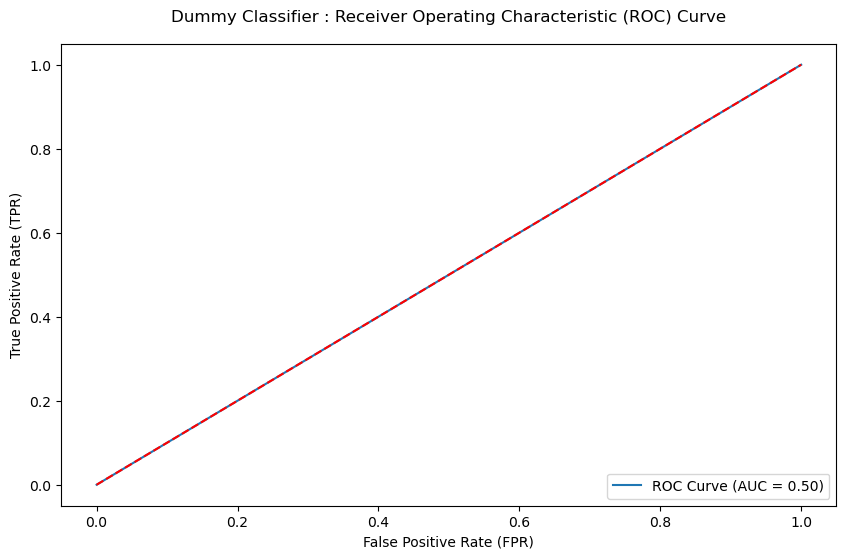



Results for Logistic Regression

Training Time     : 0.5244 seconds

Training Accuracy : 0.87

Test     Accuracy : 0.87

Performance Report for Logistic Regression

Precision is: 0.53
Recall    is: 0.15
F1 Score  is: 0.23
Accuracy  is: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     24713
           1       0.53      0.15      0.23      3682

    accuracy                           0.87     28395
   macro avg       0.71      0.57      0.58     28395
weighted avg       0.84      0.87      0.84     28395

Results for Logistic Regression

Confusion Matrix:

[[24232   481]
 [ 3131   551]]

True Negative  : 24232
False Positive :  481
False Negative : 3131
True Positive  :  551

Predicted      0     1    All
True                         
0          24232   481  24713
1           3131   551   3682
All        27363  1032  28395


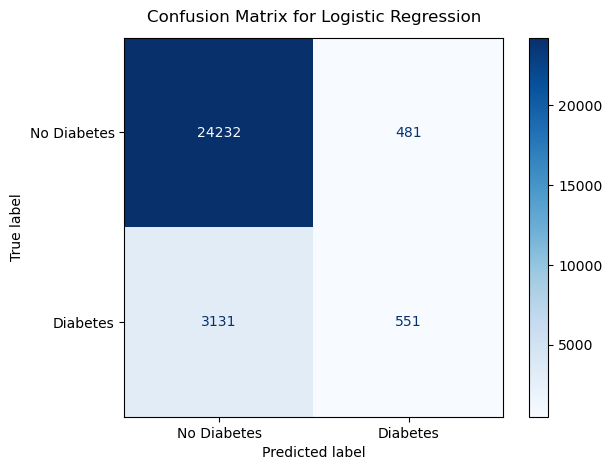

Model Name: Logistic Regression

The ROC Accuracy Score : ROC-AUC is 0.83



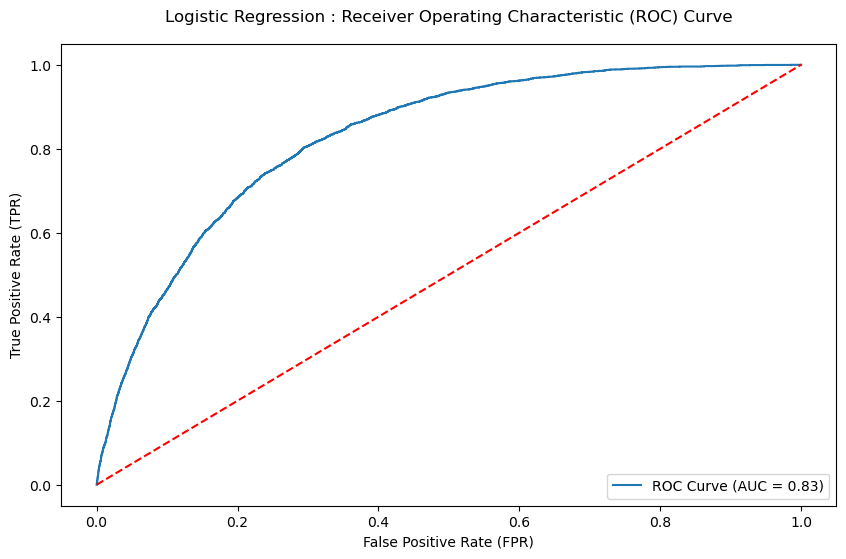



Results for Decision Tree Classifier

Training Time     : 0.2666 seconds

Training Accuracy : 1.00

Test     Accuracy : 0.81

Performance Report for Decision Tree Classifier

Precision is: 0.29
Recall    is: 0.32
F1 Score  is: 0.30
Accuracy  is: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     24713
           1       0.29      0.32      0.30      3682

    accuracy                           0.81     28395
   macro avg       0.59      0.60      0.60     28395
weighted avg       0.82      0.81      0.81     28395

Results for Decision Tree Classifier

Confusion Matrix:

[[21753  2960]
 [ 2490  1192]]

True Negative  : 21753
False Positive : 2960
False Negative : 2490
True Positive  : 1192

Predicted      0     1    All
True                         
0          21753  2960  24713
1           2490  1192   3682
All        24243  4152  28395


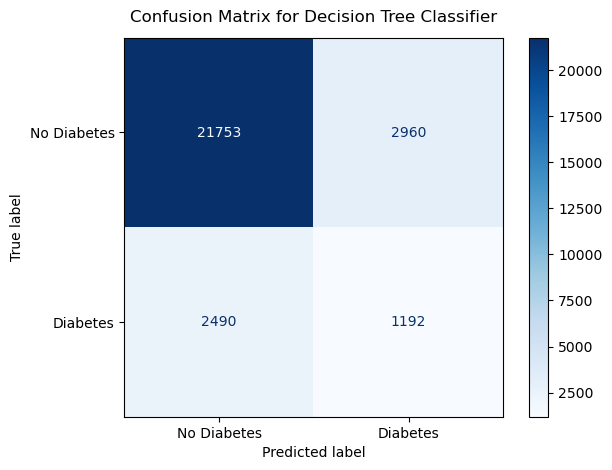

Model Name: Decision Tree Classifier

The ROC Accuracy Score : ROC-AUC is 0.60





Results for K Nearest Neighbor Classifier

Training Time     : 0.0055 seconds

Training Accuracy : 0.89

Test     Accuracy : 0.86

Performance Report for K Nearest Neighbor Classifier

Precision is: 0.40
Recall    is: 0.19
F1 Score  is: 0.26
Accuracy  is: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     24713
           1       0.40      0.19      0.26      3682

    accuracy                           0.86     28395
   macro avg       0.64      0.57      0.59     28395
weighted avg       0.82      0.86      0.84     28395

Results for K Nearest Neighbor Classifier

Confusion Matrix:

[[23653  1060]
 [ 2978   704]]

True Negative  : 23653
False Positive : 1060
False Negative : 2978
True Positive  :  704

Predicted      0     1    All
True                         
0          23653  1060  24713
1           2978   704   3682
All        26631  1764  28395


Model Name: K Nearest Neighbor Classifier

The ROC Accuracy Score : ROC-AUC is 0.72





Results for Support Vector Machines

Training Time     : 1263.0005 seconds

Training Accuracy : 0.87

Test     Accuracy : 0.87

Performance Report for Support Vector Machines

Precision is: 0.53
Recall    is: 0.01
F1 Score  is: 0.01
Accuracy  is: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     24713
           1       0.53      0.01      0.01      3682

    accuracy                           0.87     28395
   macro avg       0.70      0.50      0.47     28395
weighted avg       0.83      0.87      0.81     28395

Results for Support Vector Machines

Confusion Matrix:

[[24691    22]
 [ 3657    25]]

True Negative  : 24691
False Positive :   22
False Negative : 3657
True Positive  :   25

Predicted      0   1    All
True                       
0          24691  22  24713
1           3657  25   3682
All        28348  47  28395


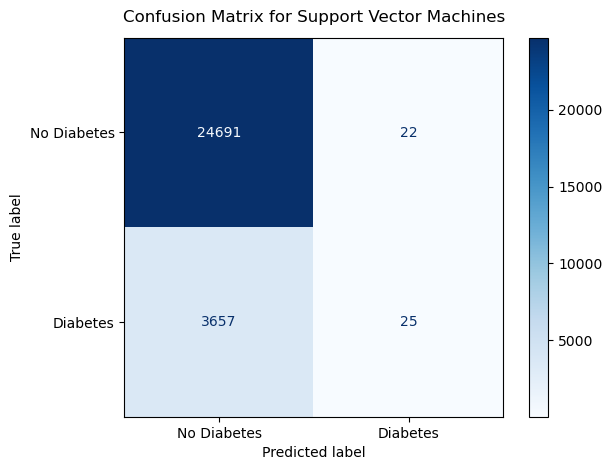

Model Name: Support Vector Machines

The ROC Accuracy Score : ROC-AUC is 0.73



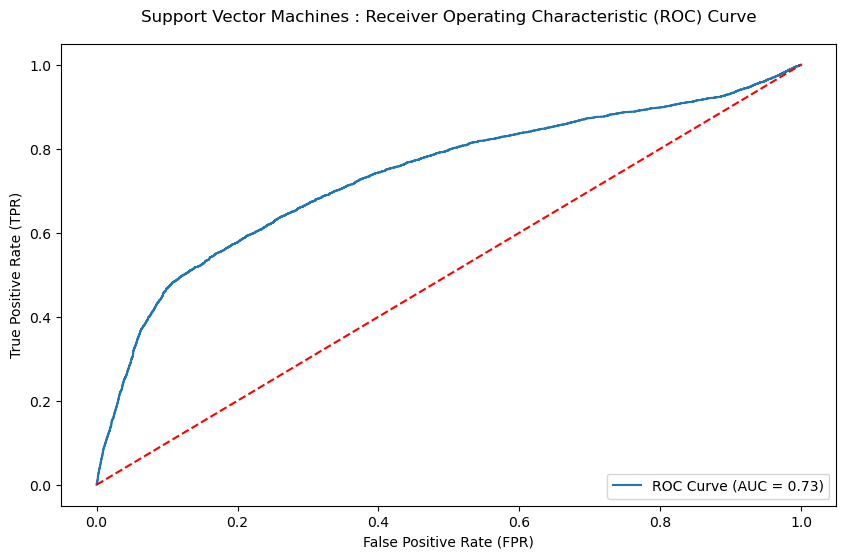

In [119]:
# Evaluate all the Model

final_results = {}

for model_name, model in model_dict.items():
    final_results[model_name] = evaluate_model(model, model_name, False)
    print('\n','='*120,'\n')

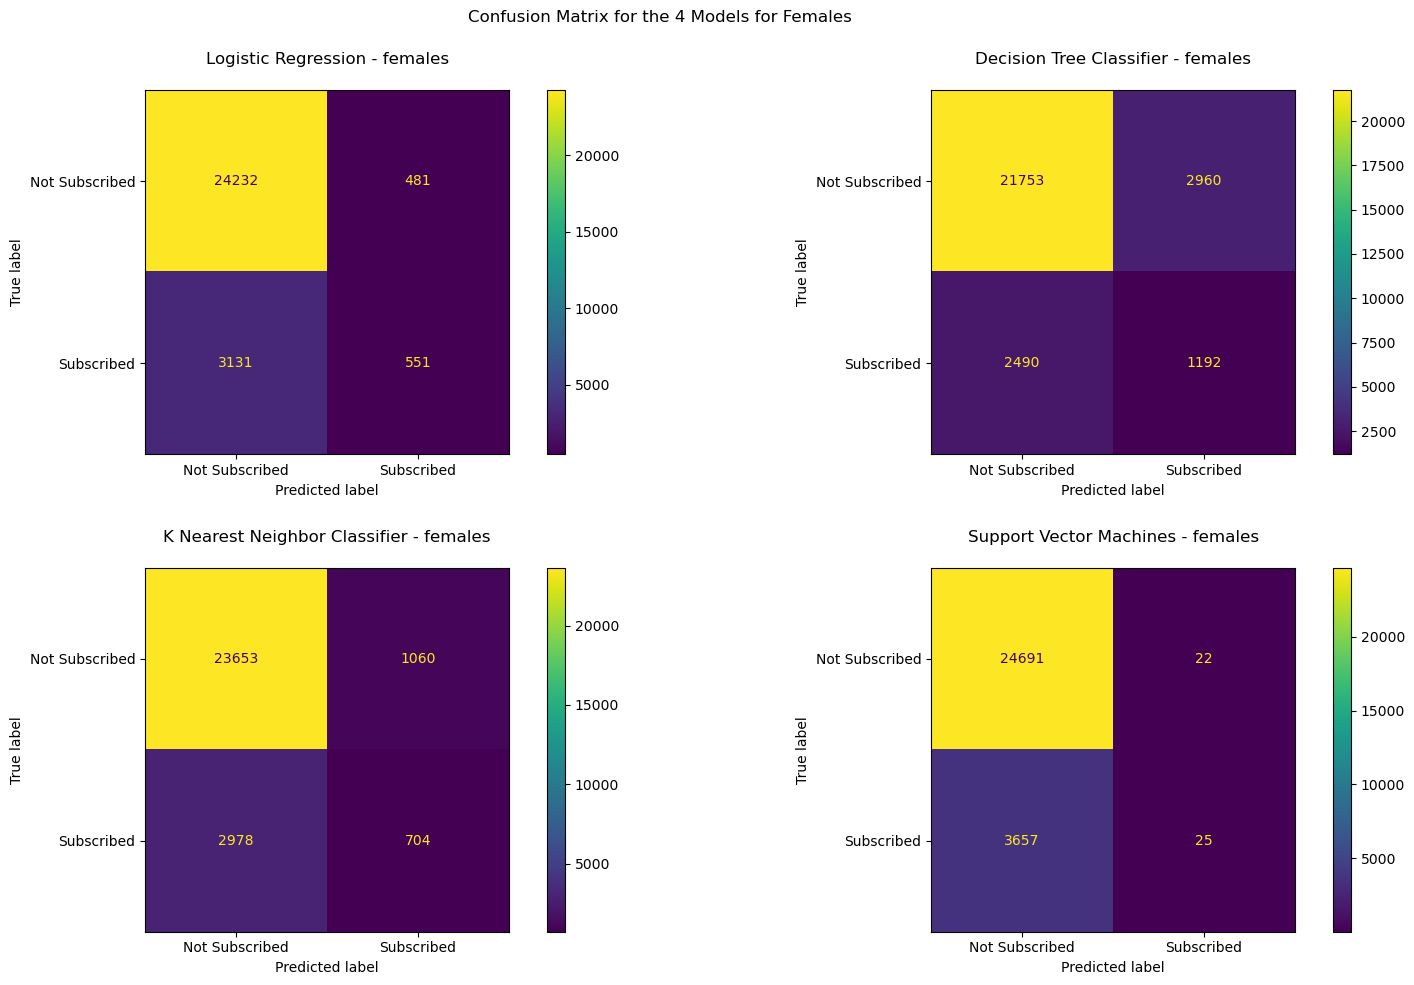

In [120]:
# Creating a 2x2 Grid of the Confusion Matrix for the 4 models

fig, axes = plt.subplots(2, 2, figsize=(16, 10))    # Create a 2x2 grid of subplots
fig.suptitle('Confusion Matrix for the 4 Models for Females')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for model_name, results in final_results.items():
    if model_name == 'Dummy Classifier': 
        #remove confusion matrix from final results
        final_results[model_name] = results[:-1]
        continue
    r,c = int(plot_count/2),int(plot_count%2)

    # Get the Confusion Matrix from the result set. The last value in the list is the Confusion Matrix for each Model
    
    conf_matrix = results[-1]

    #remove confusion matrix from final results
    final_results[model_name] = results[:-1]
    
    # Visualizing Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])

    # plot the Confusion Matrix Graph to the appropriate axes
    
    disp.plot(ax=axes[r,c])

    # set the title of each axes to the corresponding model name
    axes[r,c].set_title(f'\n{model_name} - females\n')

    plot_count += 1

plt.tight_layout()
plt.savefig('Confusion Matrix Comparison for 4 Models-females.png')
plt.show()

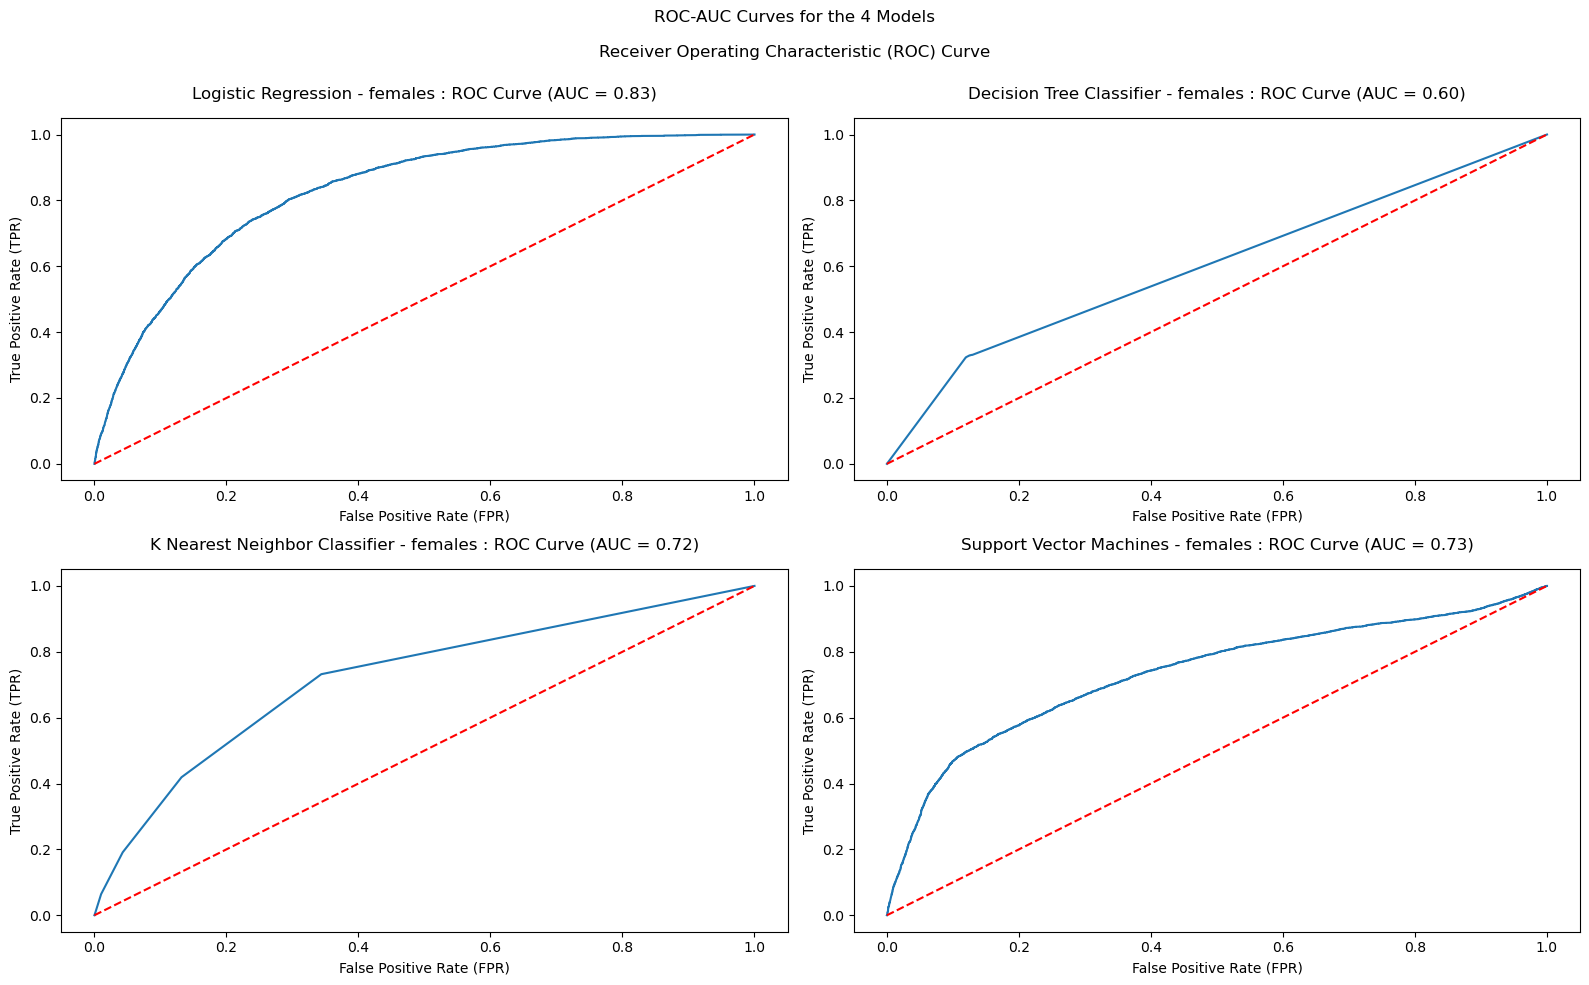

In [121]:
# Creating a 2x2 Grid of the ROC-AUC Curves for the 4 models
fig, axes = plt.subplots(2, 2, figsize=(16, 10))    # Create a 2x2 grid of subplots
fig.suptitle('ROC-AUC Curves for the 4 Models\n\nReceiver Operating Characteristic (ROC) Curve\n')  # Add a title for the entire figure

# Counter to keep track of subplot position
plot_count = 0

for model_name, results in final_results.items():
    if model_name == 'Dummy Classifier': 
        #remove fpr and tpr from final results
        final_results[model_name] = results[:-2]
        continue
    r,c = int(plot_count/2),int(plot_count%2)

    # Get the Confusion Matrix from the result set. The last value in the list is the Confusion Matrix for each Model
    
    fpr, tpr = results[-2], results[-1]

    #remove fpr and tpr from final results
    final_results[model_name] = results[:-2]
    roc_auc_val = results[7]
    
    # plot the ROC AUC Curve to the appropriate axes
    label_val = 'ROC Curve (AUC = ' + roc_auc_val + ')'
    
    axes[r,c].plot(fpr, tpr, label=label_val)
    axes[r,c].plot([0, 1], [0, 1], 'k--',color='red')
    axes[r,c].set_xlabel('False Positive Rate (FPR)')
    axes[r,c].set_ylabel('True Positive Rate (TPR)')
    axes[r,c].set_title(f'{model_name} - females : {label_val}',y=1.03)
    
    # set the title of each axes to the corresponding model name
    #axes[r,c].set_title(f'{model_name}')

    plot_count += 1

plt.tight_layout()
plt.savefig('ROC-AUC Curve Comparison for 4 Models-female.png')
plt.show()

In [122]:
final_df = pd.DataFrame(final_results).T
final_df.columns = ['Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision Score', 
                    'Recall Score', 'Accuracy Score', 'F1 Score', 'ROC AUC', 
                   'True Negative', 'False Positive', 'False Negative', 'True Positive'] 
final_df

Train Time Train Accuracy Test Accuracy  \
Dummy Classifier                  0.0032           0.87          0.87   
Logistic Regression               0.5244           0.87          0.87   
Decision Tree Classifier          0.2666           1.00          0.81   
K Nearest Neighbor Classifier     0.0055           0.89          0.86   
Support Vector Machines        1263.0005           0.87          0.87   

                              Precision Score Recall Score Accuracy Score  \
Dummy Classifier                         0.00         0.00           0.87   
Logistic Regression                      0.53         0.15           0.87   
Decision Tree Classifier                 0.29         0.32           0.81   
K Nearest Neighbor Classifier            0.40         0.19           0.86   
Support Vector Machines                  0.53         0.01           0.87   

                              F1 Score ROC AUC True Negative False Positive  \
Dummy Classifier                  0.00    0.50         24713              0   
Logistic Regression               0.23    0.83         24232            481   
Decision Tree Classifier          0.30    0.60         21753           2960   
K Nearest Neighbor Classifier     0.26    0.72         23653           1060   
Support Vector Machines           0.01    0.73         24691             22   

                              False Negative True Positive  
Dummy Classifier                        3682             0  
Logistic Regression                     3131           551  
Decision Tree Classifier                2490          1192  
K Nearest Neighbor Classifier           2978           704  
Support Vector Machines                 3657            25